### Lead Scoring Case Study - Vyankatesh Kale

**Problem Statement**
- X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

**Goal of Case Study**

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1 : Importing Library and Data

In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Suppressing warnings
import warnings 
warnings.filterwarnings(action = 'ignore')

In [2]:
# read the dataset
lead = pd.read_csv(r'C:\Users\Admin\Desktop\Data Science\Machine Learning\Lead Scoring Assignment\Leads.csv')

## Step 2 : Understanding the Data

In [3]:
# checking headings of the dataset
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# check the size of dataset
lead.size

341880

In [5]:
# check the shape of dataset
lead.shape

(9240, 37)

In [6]:
# check the info of dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# describe the dataset
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# checking missing values
lead.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Checking percentage of the missing values
round((lead.isnull().mean()*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Step 3 : Data Cleaning

In [10]:
# drop columns having unique values 'Prospect ID' 'Lead Number'
lead.drop(['Prospect ID','Lead Number'],axis = 1 , inplace = True)

In [11]:
# drop columns having null values >35%
lead.drop(['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis = 1 , inplace = True)
         

In [12]:
# Replacing 'Select' values with 'NaN'
lead = lead.replace('Select','Not Provided')

In [13]:
# rechecking the percentage of missing values
lead.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### Imputing Values

In [14]:
# 'Lead Source' column is categorical so use mode and fill the value in this column
mod=lead['Lead Source'].mode()[0]
lead['Lead Source']=lead['Lead Source'].fillna(mod)

In [15]:
# 'TotalVisits' column is Numerical so use median and fill the value in this column
med=lead['TotalVisits'].median()
lead['TotalVisits']=lead['TotalVisits'].fillna(med)

In [16]:
# 'Page Views Per Visit' column is Numerical so use median and fill the value in this column
med=lead['Page Views Per Visit'].median()
lead['Page Views Per Visit']=lead['Page Views Per Visit'].fillna(med)

In [17]:
# 'Last Activity' column is categorical so use mode and fill the value in this column
lead['Last Activity']=lead['Last Activity'].fillna(lead['Last Activity'].mode()[0])

In [18]:
# 'Country' column is categorical so use mode and fill the value in this column
lead['Country']=lead['Country'].fillna(lead['Country'].mode()[0])

In [19]:
# 'Specialization' column is categorical so use mode and fill the value in this column
lead['Specialization']=lead['Specialization'].fillna(lead['Specialization'].mode()[0])

In [20]:
# 'How did you hear about X Education' column is categorical so use mode and fill the value in this column
lead['How did you hear about X Education']=lead['How did you hear about X Education'].fillna(lead['How did you hear about X Education'].mode()[0])

In [21]:
# 'What is your current occupation' column is categorical so use mode and fill the value in this column
lead['What is your current occupation']=lead['What is your current occupation'].fillna(lead['What is your current occupation'].mode()[0])

In [22]:
# 'What matters most to you in choosing a course' column is categorical so use mode and fill the value in this column
lead['What matters most to you in choosing a course']=lead['What matters most to you in choosing a course'].fillna(lead['What matters most to you in choosing a course'].mode()[0])

In [23]:
# 'Lead Profile' column is categorical so use mode and fill the value in this column
lead['Lead Profile']=lead['Lead Profile'].fillna(lead['Lead Profile'].mode()[0])

In [24]:
# 'City' column is categorical so use mode and fill the value in this column
lead['City']=lead['City'].fillna(lead['City'].mode()[0])

In [25]:
# checking the missing values after imputing the values
lead.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

- **All columns have no missing values so we are good to go for Analysis part**

In [26]:
lead['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- Here column 'Lead Source' is having same name 'Google' but in different format 'google' so Capitalize the first character of this column

In [27]:
# Capitalize first character of the column 'Lead Source'
lead['Lead Source'] = lead['Lead Source'].apply(lambda x:x.capitalize())
lead['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Pay per click ads       1
Blog                    1
Welearn                 1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Nc_edm                  1
Name: Lead Source, dtype: int64

## Step 4 : Exploratory Data Analysis

### Categorical Variables

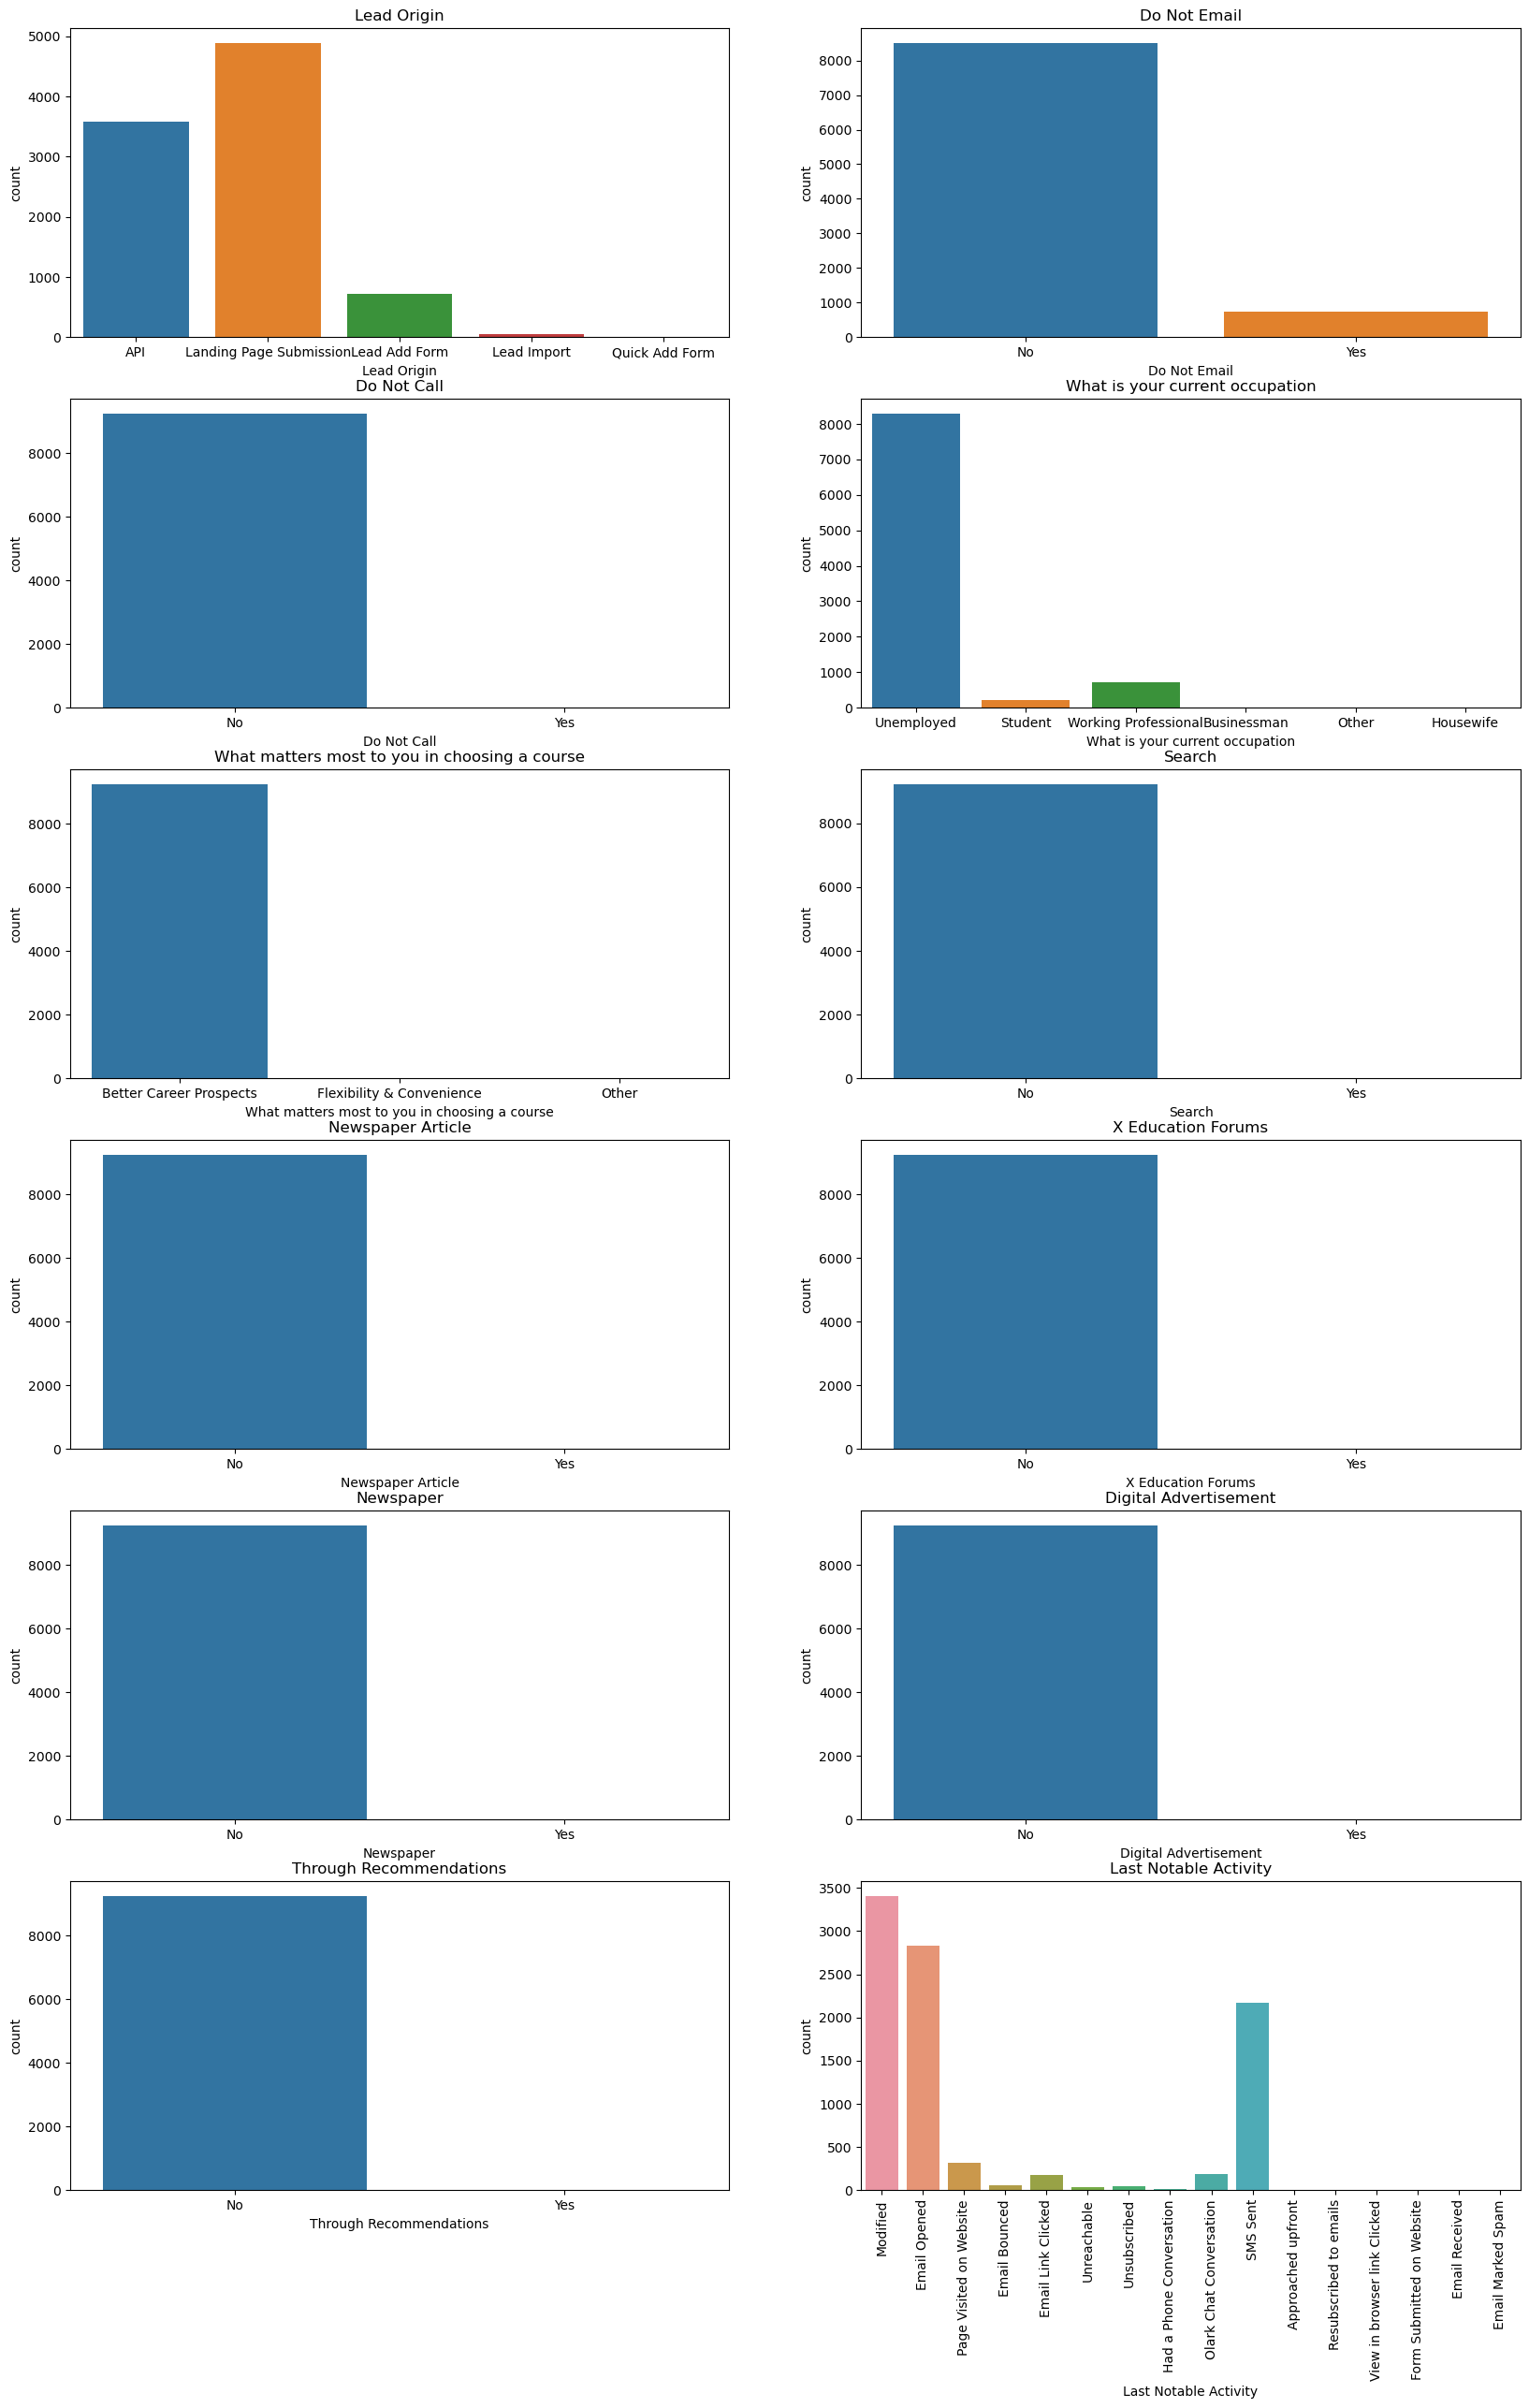

In [28]:
plt.figure(figsize=(20,30))
plt.subplot(6,2,1)
sns.countplot(lead['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(lead['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead['What is your current occupation'])
plt.title('What is your current occupation')

plt.subplot(6,2,5)
sns.countplot(lead['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course')

plt.subplot(6,2,6)
sns.countplot(lead['Search'])
plt.title('Search')

plt.subplot(6,2,7)
sns.countplot(lead['Newspaper Article'])
plt.title('Newspaper Article')


plt.subplot(6,2,8)
sns.countplot(lead['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,9)
sns.countplot(lead['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,10)
sns.countplot(lead['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,11)
sns.countplot(lead['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,12)
sns.countplot(lead['Last Notable Activity'])
plt.title('Last Notable Activity')
plt.tick_params(axis = 'x',rotation = 90)
plt.show()


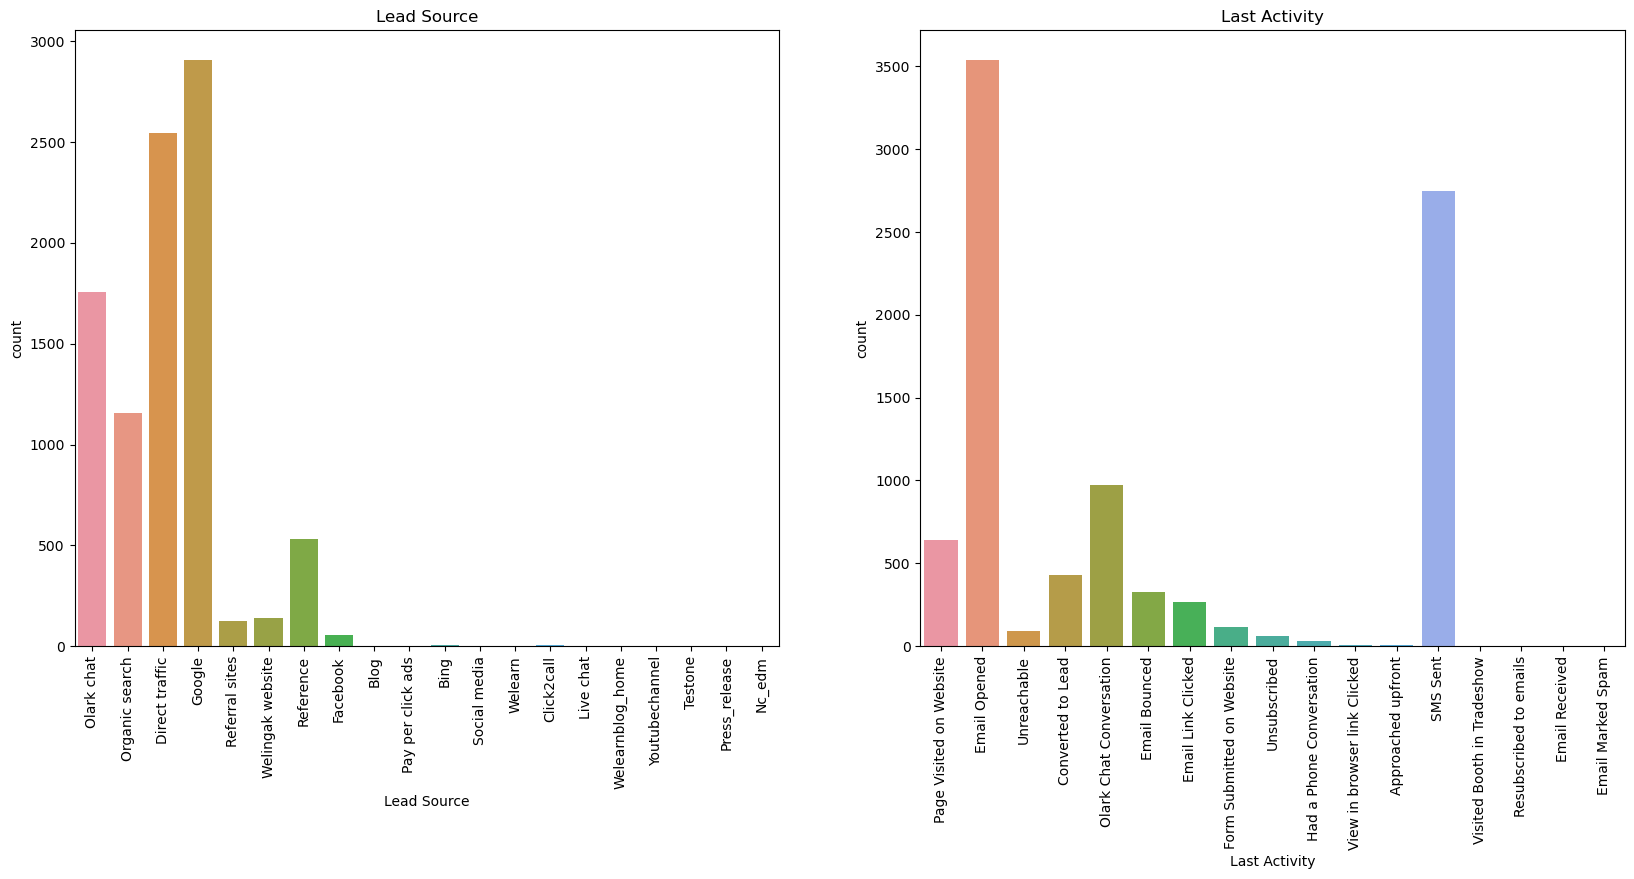

In [29]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(lead['Lead Source'])
plt.title('Lead Source')
plt.tick_params(axis = 'x',rotation = 90)

plt.subplot(1,2,2)
sns.countplot(lead['Last Activity'])
plt.title('Last Activity')
plt.tick_params(axis = 'x',rotation = 90)
plt.show()

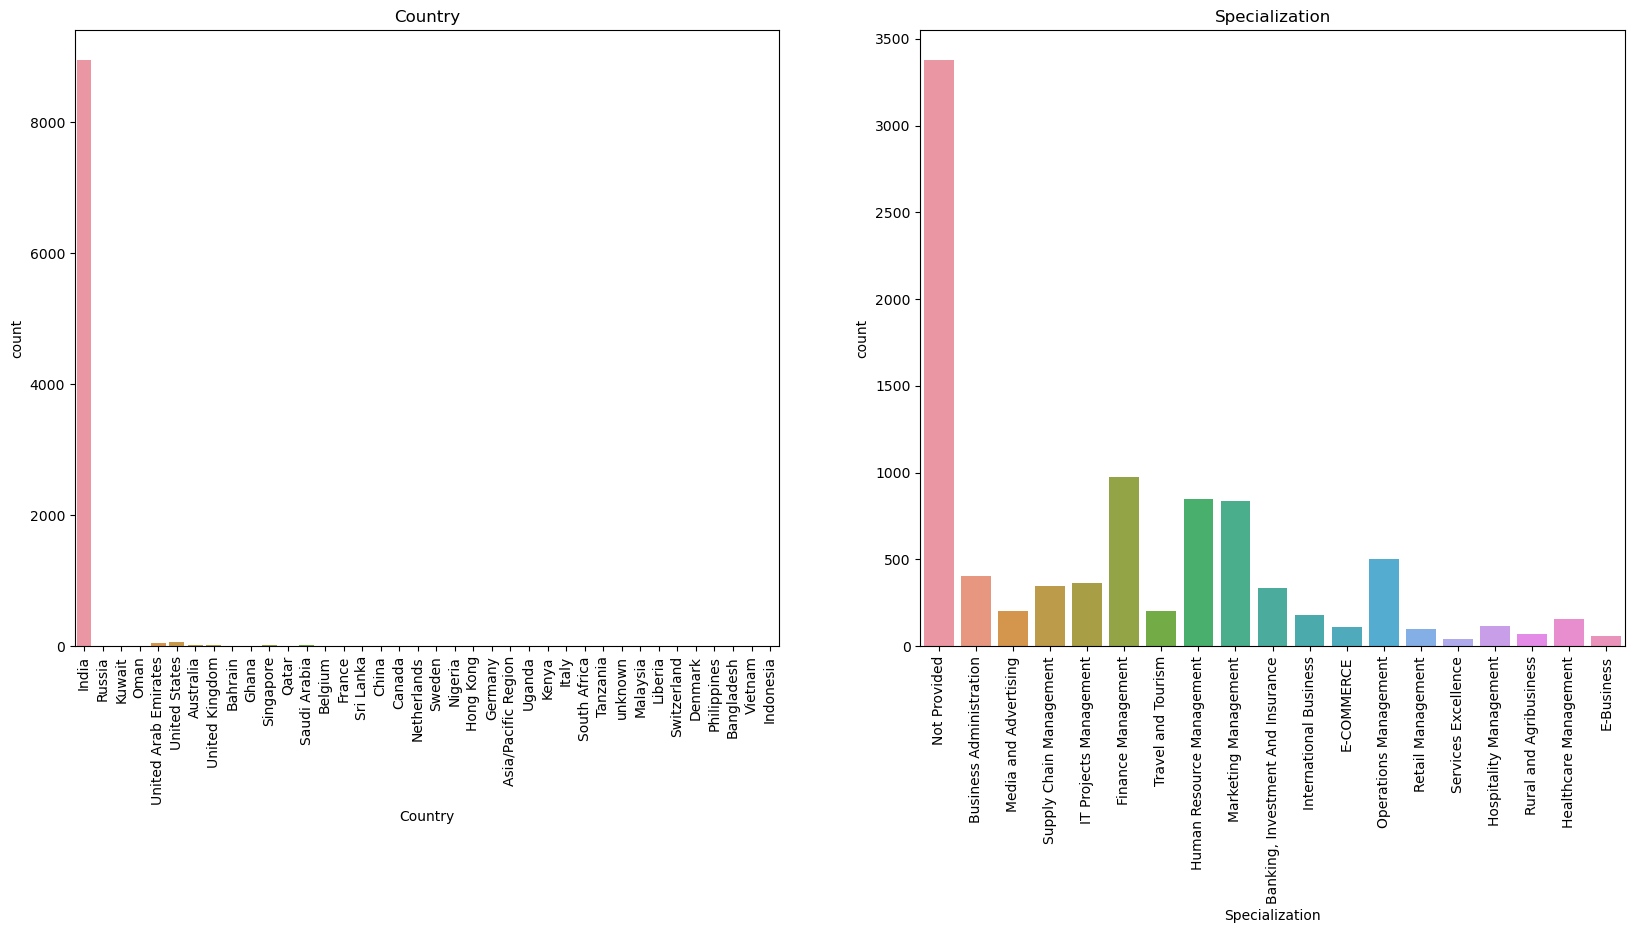

In [30]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(lead['Country'])
plt.title('Country')
plt.tick_params(axis = 'x',rotation = 90)

plt.subplot(1,2,2)
sns.countplot(lead['Specialization'])
plt.title('Specialization')
plt.tick_params(axis = 'x',rotation = 90)

plt.show()

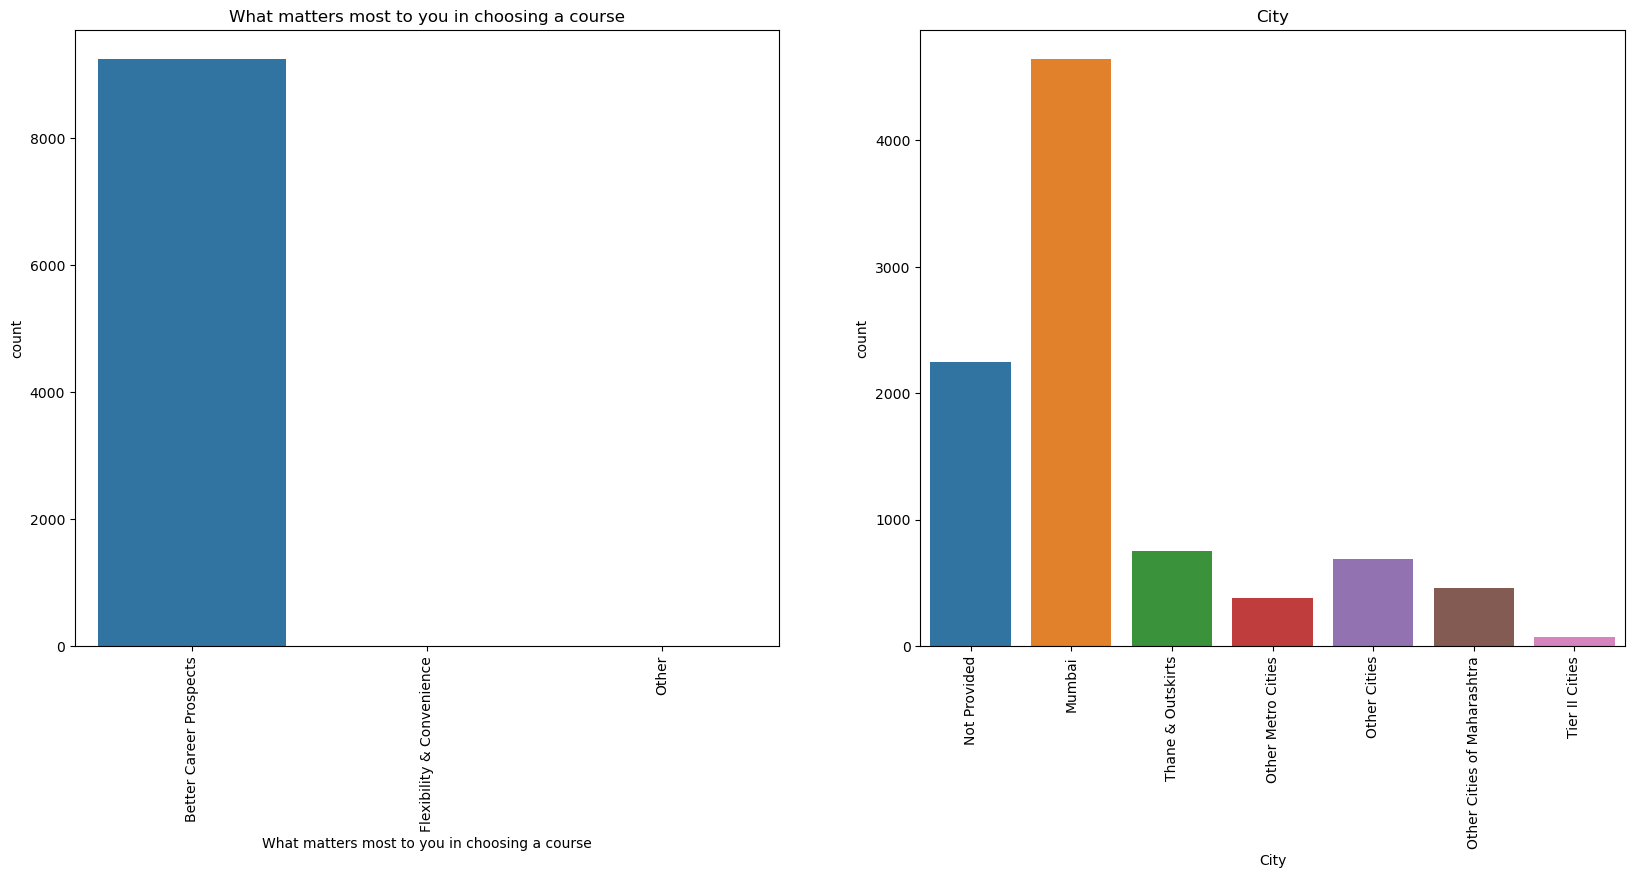

In [31]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(lead['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course')
plt.tick_params(axis = 'x',rotation = 90)

plt.subplot(1,2,2)
sns.countplot(lead['City'])
plt.title('City')
plt.tick_params(axis = 'x',rotation = 90)

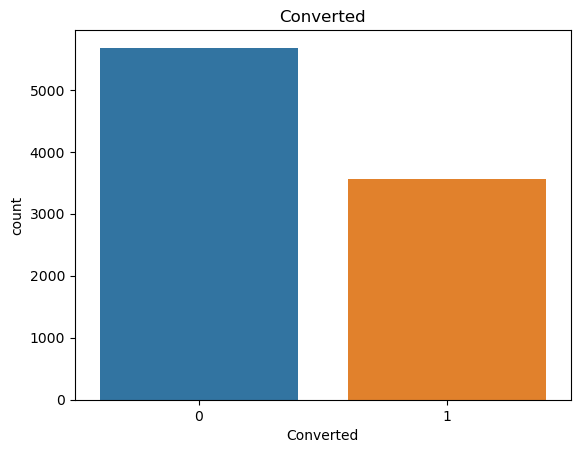

In [32]:
sns.countplot(lead['Converted'])
plt.title('Converted')
plt.show()

### Numerical Variables

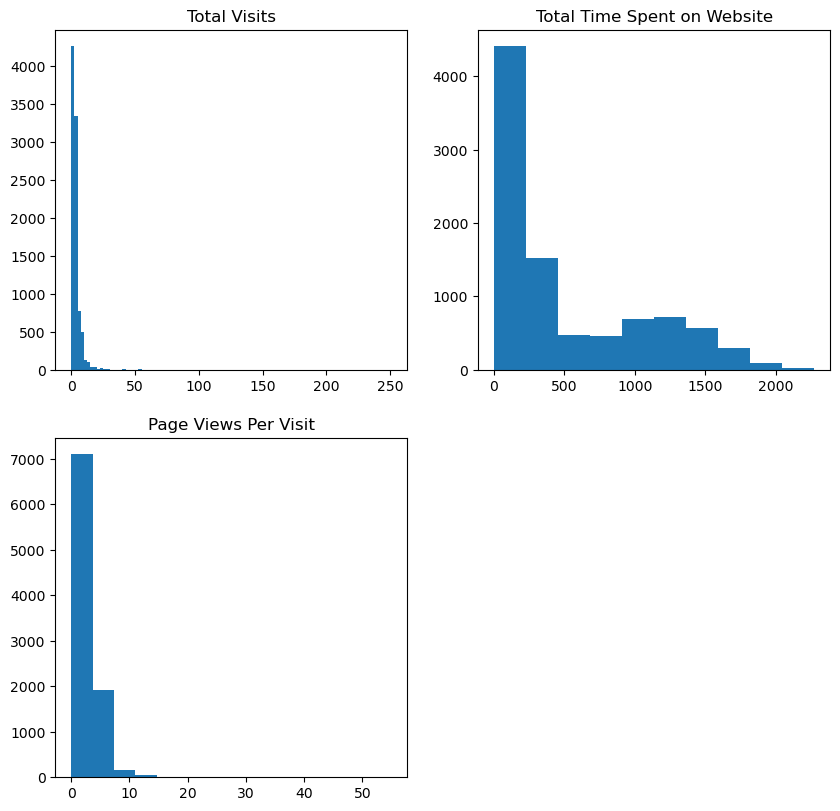

In [33]:
plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
plt.hist(lead['TotalVisits'],bins = 100)
plt.title('Total Visits')

plt.subplot(3,2,2)
plt.hist(lead['Total Time Spent on Website'],bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(3,2,3)
plt.hist(lead['Page Views Per Visit'],bins = 15)
plt.title('Page Views Per Visit')
plt.show()

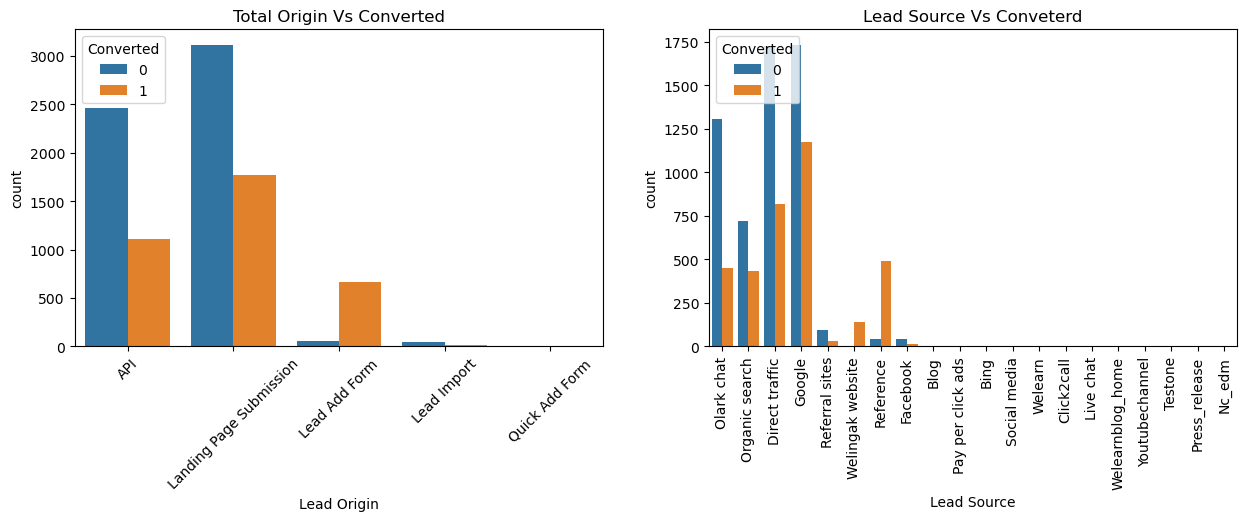

In [34]:
plt.figure(figsize=(15,14))

plt.subplot(3,2,1)
sns.countplot(x = lead['Lead Origin'], hue = lead['Converted'])
plt.title('Total Origin Vs Converted')
plt.tick_params(axis = 'x',rotation = 45)

plt.subplot(3,2,2)
sns.countplot(x = lead['Lead Source'],hue = lead['Converted'])
plt.title('Lead Source Vs Conveterd')
plt.tick_params(axis = 'x',rotation = 90)
plt.show()

- Inference

    1. Maximum leads are genrerated from the "Google"
    2. "Reference" and "Welingak website" have the higher conversion rate

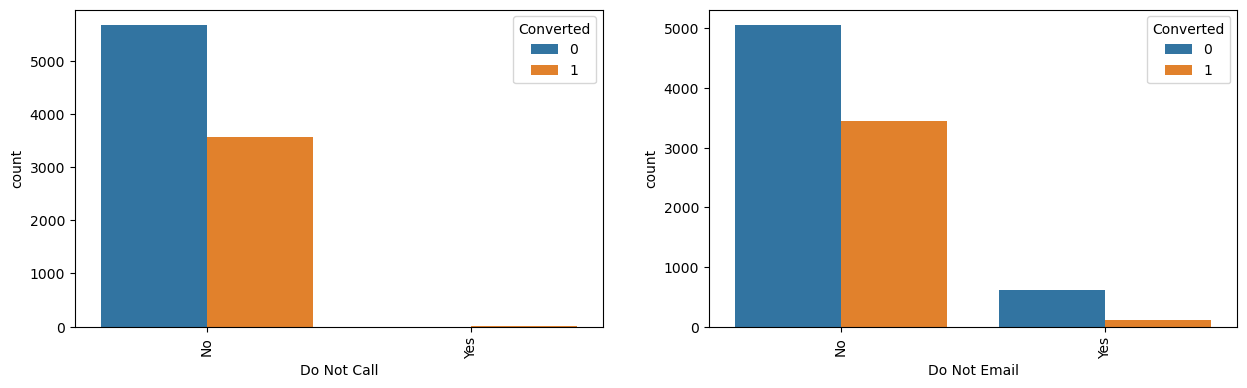

In [35]:
plt.figure(figsize=(15,14))

plt.subplot(3,2,1)
sns.countplot(x = lead['Do Not Call'], hue = lead['Converted'])
plt.tick_params(axis = 'x',rotation = 90)

plt.subplot(3,2,2)
sns.countplot(x = lead['Do Not Email'],hue = lead['Converted'])
plt.tick_params(axis = 'x',rotation = 90)
plt.show()

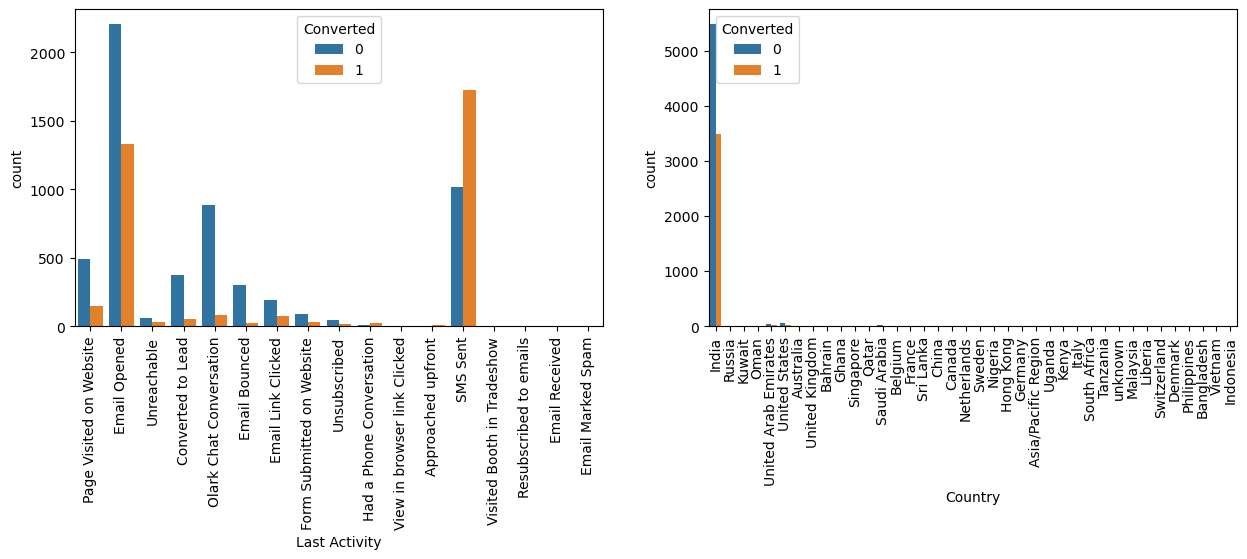

In [36]:
plt.figure(figsize=(15,14))

plt.subplot(3,2,1)
sns.countplot(x = lead['Last Activity'], hue = lead['Converted'])
plt.tick_params(axis = 'x',rotation = 90)

plt.subplot(3,2,2)
sns.countplot(x = lead['Country'],hue = lead['Converted'])
plt.tick_params(axis = 'x',rotation = 90)
plt.show()

- Inference 
    1. Last Activity as "Email Opened" have the highest lead but conversion rate is not good
    2. "SMS sent" have high conversion rate
    3. Most of the data is from Country "India" so it is not that insightfull,we can drop this column

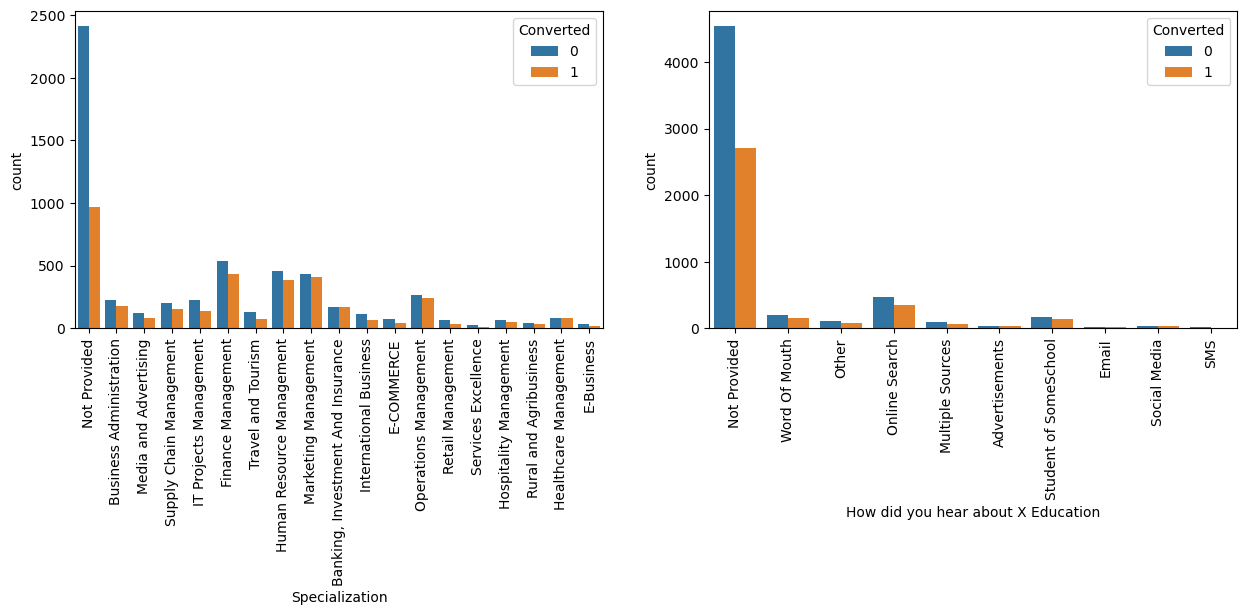

In [37]:
plt.figure(figsize=(15,14))

plt.subplot(3,2,1)
sns.countplot(x = lead['Specialization'], hue = lead['Converted'])
plt.tick_params(axis = 'x',rotation = 90)

plt.subplot(3,2,2)
sns.countplot(x = lead['How did you hear about X Education'],hue = lead['Converted'])
plt.tick_params(axis = 'x',rotation = 90)
plt.show()

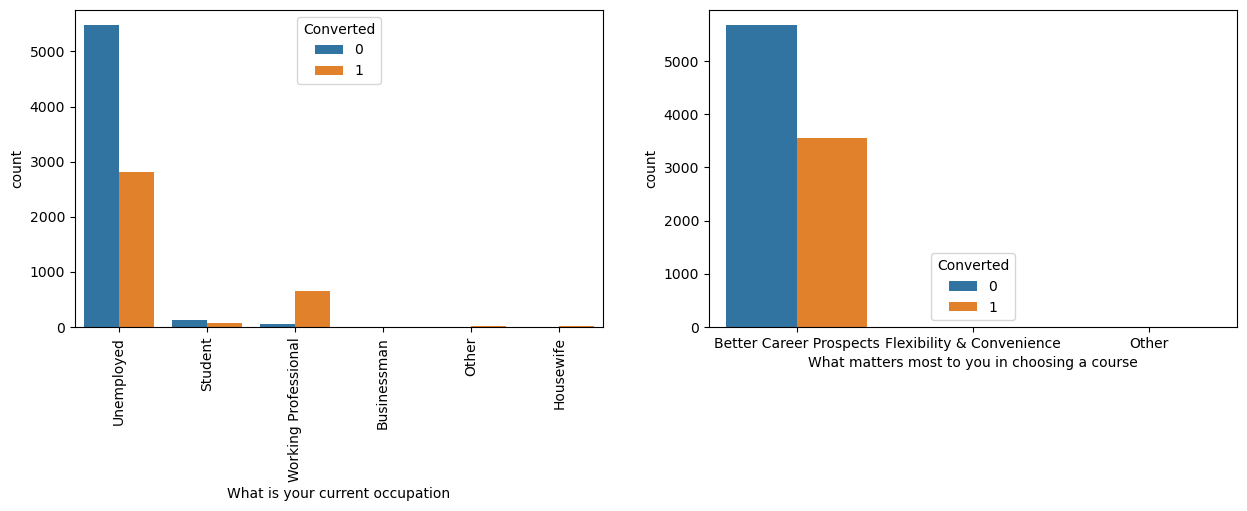

In [38]:
plt.figure(figsize=(15,14))

plt.subplot(3,2,1)
sns.countplot(x = lead['What is your current occupation'], hue = lead['Converted'])
plt.tick_params(axis = 'x',rotation = 90)

plt.subplot(3,2,2)
sns.countplot(x = lead['What matters most to you in choosing a course'],hue = lead['Converted'])

plt.show()

- Inference 
    1. "Unemployed" having the highest lead but conversion rate is not good
    2. "Working Professional" have higher conversion rate

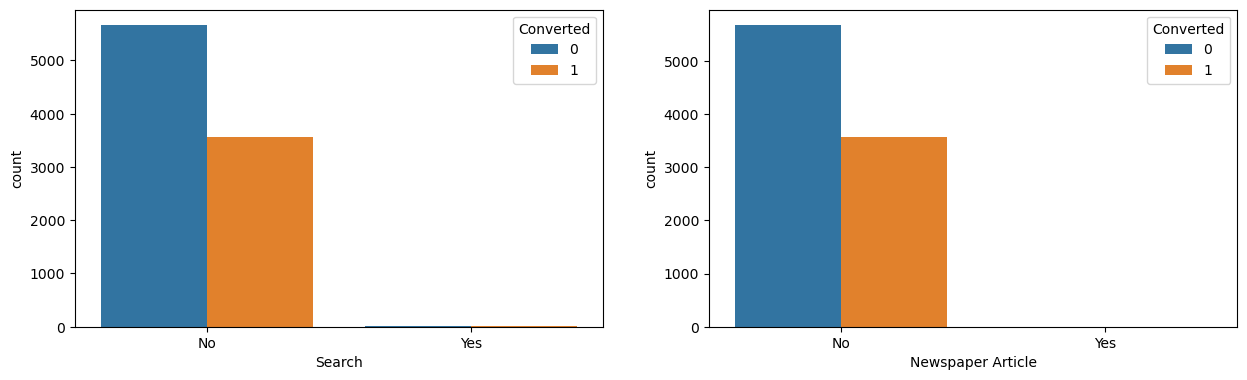

In [39]:
plt.figure(figsize=(15,14))

plt.subplot(3,2,1)
sns.countplot(x = lead['Search'], hue = lead['Converted'])


plt.subplot(3,2,2)
sns.countplot(x = lead['Newspaper Article'],hue = lead['Converted'])

plt.show()

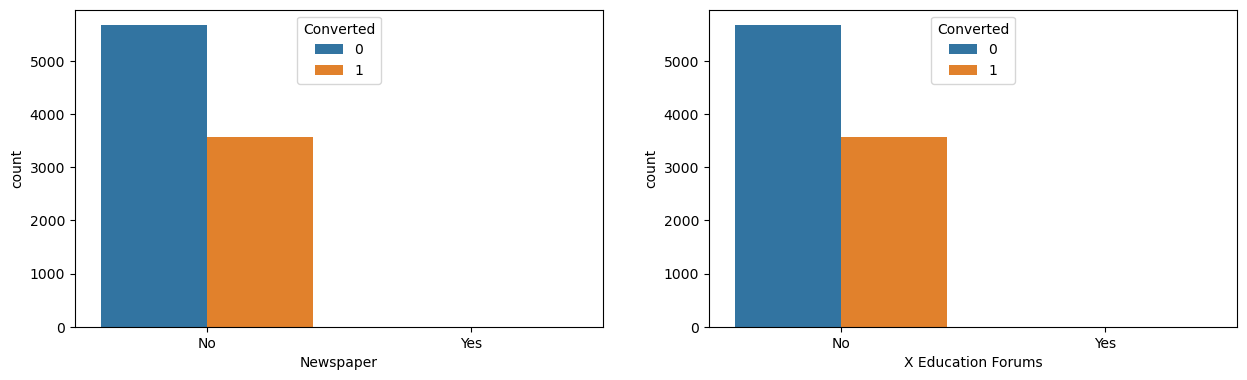

In [40]:
plt.figure(figsize=(15,14))

plt.subplot(3,2,1)
sns.countplot(x = lead['Newspaper'], hue = lead['Converted'])


plt.subplot(3,2,2)
sns.countplot(x = lead['X Education Forums'],hue = lead['Converted'])

plt.show()

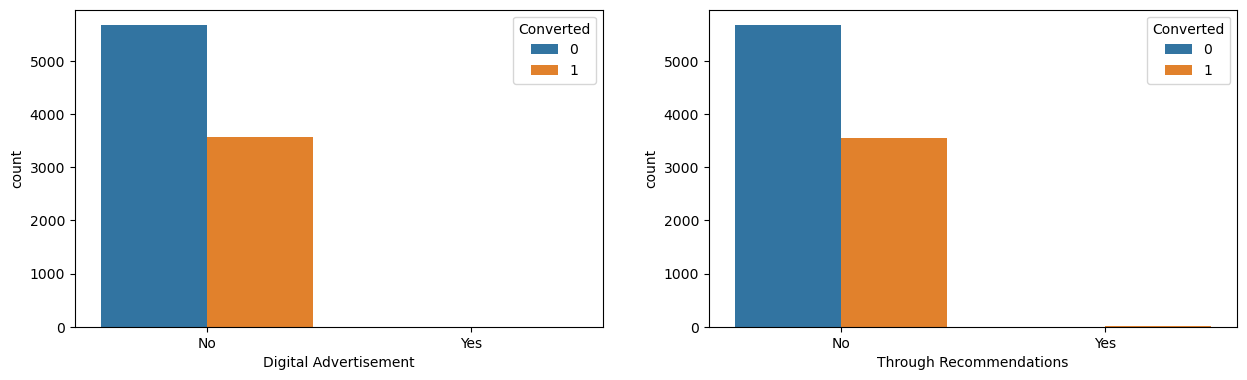

In [41]:
plt.figure(figsize=(15,14))

plt.subplot(3,2,1)
sns.countplot(x = lead['Digital Advertisement'], hue = lead['Converted'])

plt.subplot(3,2,2)
sns.countplot(x = lead['Through Recommendations'],hue = lead['Converted'])

plt.show()

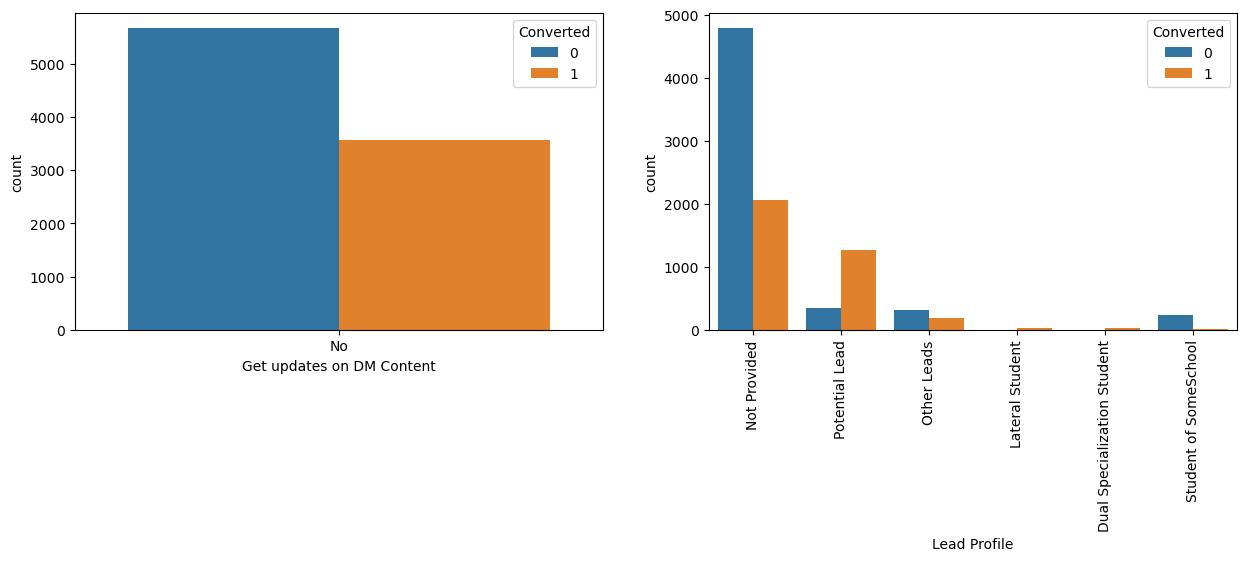

In [42]:
plt.figure(figsize=(15,14))

plt.subplot(3,2,1)
sns.countplot(x = lead['Get updates on DM Content'], hue = lead['Converted'])

plt.subplot(3,2,2)
sns.countplot(x = lead['Lead Profile'],hue = lead['Converted'])
plt.tick_params(axis = 'x',rotation = 90)


plt.show()

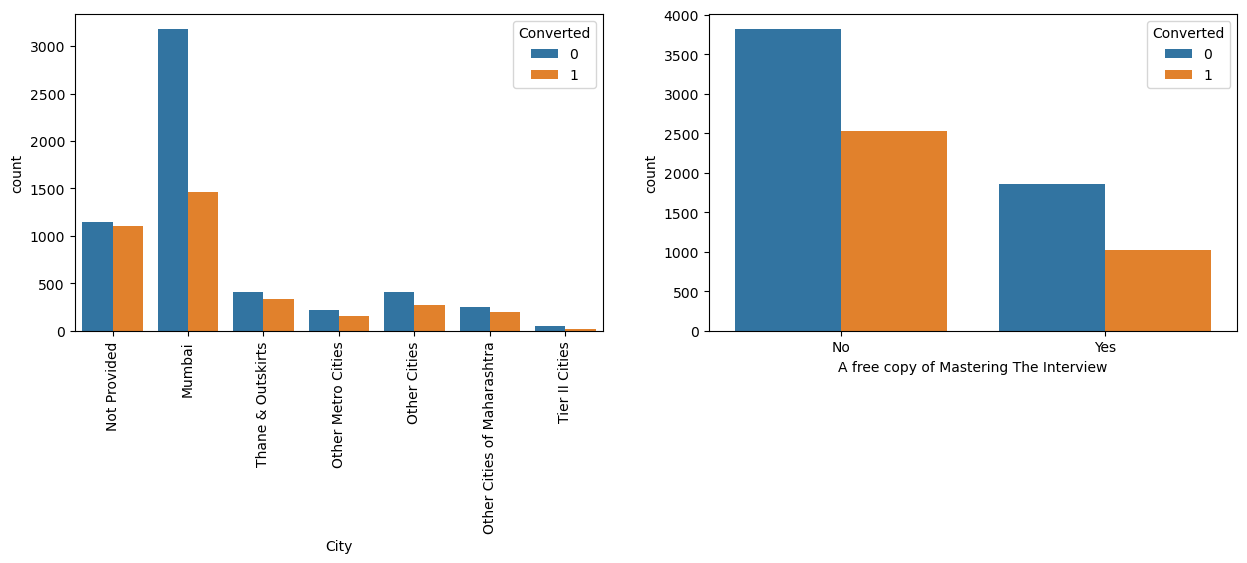

In [43]:
plt.figure(figsize=(15,14))

plt.subplot(3,2,1)
sns.countplot(x = lead['City'], hue = lead['Converted'])
plt.tick_params(axis = 'x',rotation = 90)

plt.subplot(3,2,2)
sns.countplot(x = lead['A free copy of Mastering The Interview'],hue = lead['Converted'])



plt.show()

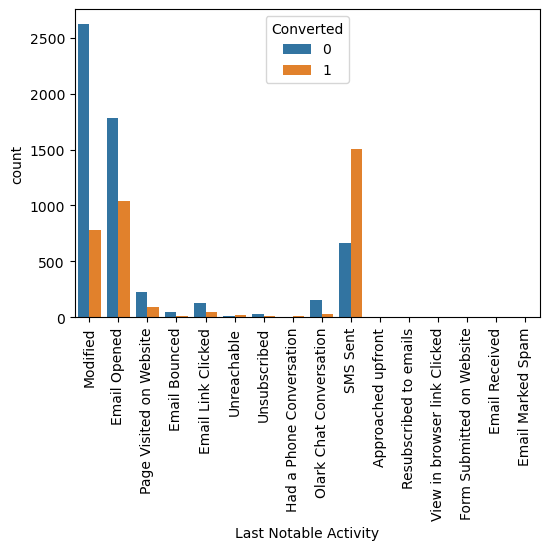

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(x = lead['Last Notable Activity'], hue = lead['Converted'])
plt.tick_params(axis = 'x',rotation = 90)
plt.show()

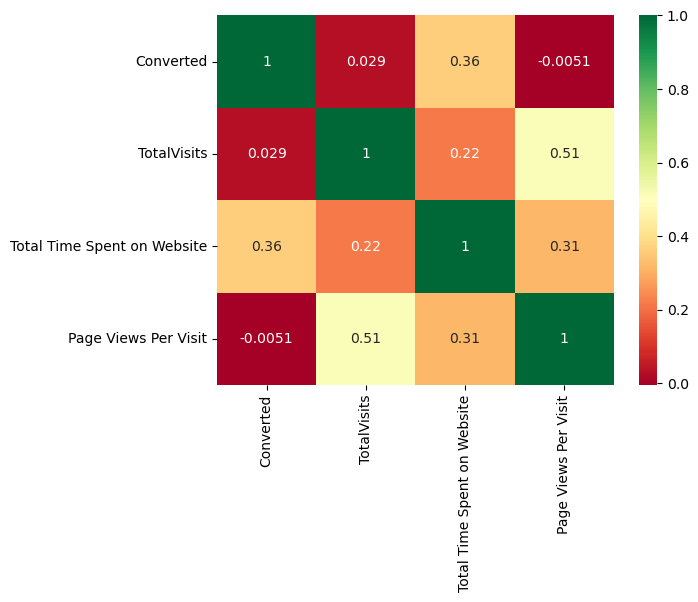

In [45]:
# Check the correlation
sns.heatmap(lead.corr() , cmap = 'RdYlGn',annot = True)
plt.show()

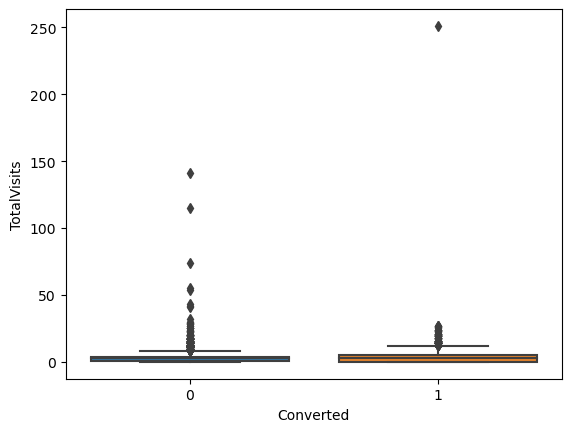

In [46]:
# Plotting boxplot and check outliersabs
sns.boxplot(y= lead['TotalVisits'],x = lead['Converted'])
plt.show()

- Inferences
    1. Median of both converted and non converted are same, we can't conclude anything on the basis of TotalVisits

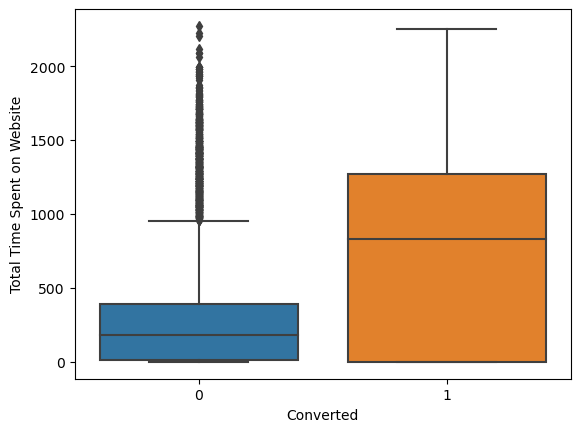

In [47]:
sns.boxplot(x = lead['Converted'] ,y= lead['Total Time Spent on Website'])
plt.show()

- Inferences 
    1. Median of converted is higher than non converted
    2. Converted leads are those who have spend more time on the website

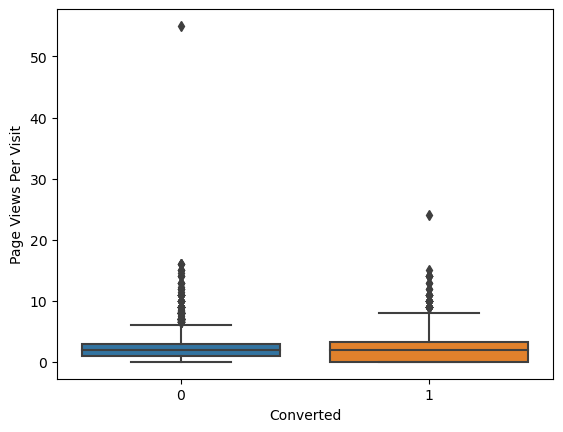

In [48]:
sns.boxplot(x = lead['Converted'] ,y= lead['Page Views Per Visit'])
plt.show()

- Inference
    1. Median of both converted and non converted leads are same

#### Droping unwanted columns

In [49]:
# Droping unwanted columns those not providing much information
lead = lead.drop(['Country','Do Not Call','What matters most to you in choosing a course','Search','Magazine','City','How did you hear about X Education','Newspaper Article','X Education Forums',
                 'Digital Advertisement','Newspaper','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                 'A free copy of Mastering The Interview','Last Notable Activity','Through Recommendations'], axis = 1)

In [50]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Profile
0,API,Olark chat,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,Not Provided
1,API,Organic search,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,Not Provided
2,Landing Page Submission,Direct traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Potential Lead
3,Landing Page Submission,Direct traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Not Provided
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,Not Provided


## Step 5 : Data Preparation

In [51]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Lead Profile'],
      dtype='object')

In [52]:
lead['Lead Profile'].value_counts()

Not Provided                   6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [53]:
# Converting Yes = 1 and No = 0

lead['Do Not Email'] = lead['Do Not Email'].map({'Yes': 1, 'No': 0})


In [54]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Profile
0,API,Olark chat,0,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,Not Provided
1,API,Organic search,0,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,Not Provided
2,Landing Page Submission,Direct traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Potential Lead
3,Landing Page Submission,Direct traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Not Provided
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,Not Provided


### Creating Dummy Variables

In [55]:
#Creating dummies for categorical columns
cat_cols = lead.select_dtypes(include='object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Lead Profile'],
      dtype='object')

In [56]:
#Creating dummies for categorical columns
dummy = pd.get_dummies(lead['Lead Origin'],drop_first= True)
lead = pd.concat([lead,dummy],axis = 1)

dummy = pd.get_dummies(lead['Lead Source'],prefix = 'Lead Source')
lead = pd.concat([lead,dummy],axis = 1)


dummy = pd.get_dummies(lead['Specialization'],prefix = 'Specialization')
dummy = dummy.drop(['Specialization_Not Provided'],1)
lead = pd.concat([lead,dummy],axis = 1)

dummy = pd.get_dummies(lead['What is your current occupation'],prefix = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Other'],1)
lead = pd.concat([lead,dummy],axis = 1)


dummy = pd.get_dummies(lead['Lead Profile'],prefix = 'Lead Profile')
dummy = dummy.drop(['Lead Profile_Not Provided'],1)
lead = pd.concat([lead,dummy],axis = 1)


In [57]:
# Now drop original columns as we have dummies
lead.drop(cat_cols, 1 , inplace = True)

In [58]:
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Lead Source_Bing,...,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Step 6 : Train-Test Split

In [59]:
from sklearn.model_selection import train_test_split


In [60]:
X = lead.drop('Converted', axis = 1)
y = lead['Converted']

In [61]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Lead Source_Bing,Lead Source_Blog,...,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# splitting data into train and test
X_train ,X_test , y_train ,y_test = train_test_split(X, y , test_size=0.2 , random_state=100)

### Feature Scalling

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
#create a list for numerical variables
num_var = X_train.select_dtypes(include=['float64','int64']).columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Lead Source_Bing,Lead Source_Blog,...,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
7263,-0.293157,-0.677527,-0.884942,-1.086491,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6468,-0.293157,-0.287853,-0.632201,-0.166646,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7833,-0.293157,-0.287853,-0.740257,-0.166646,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4461,-0.293157,0.101820,2.006923,0.753199,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8453,-0.293157,-0.677527,-0.884942,-1.086491,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
#after scaling checking the numeric variables
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Lead Source_Bing,Lead Source_Blog,...,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
count,7.392000e+03,7.392000e+03,7.392000e+03,7.392000e+03,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,...,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000
mean,3.839371e-16,1.238037e-16,2.972310e-17,-2.486888e-16,0.530032,0.079140,0.005411,0.000135,0.000541,0.000135,...,0.000812,0.001218,0.020427,0.898674,0.077516,0.002300,0.002706,0.052489,0.173160,0.023674
std,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,0.499131,0.269975,0.073367,0.011631,0.023257,0.011631,...,0.028481,0.034874,0.141467,0.301780,0.267427,0.047904,0.051949,0.223026,0.378411,0.152042
min,-2.931569e-01,-6.775270e-01,-8.849416e-01,-1.086491e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.931569e-01,-4.826902e-01,-8.629642e-01,-6.265683e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.931569e-01,-9.301665e-02,-4.344041e-01,-1.666459e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-2.931569e-01,2.966569e-01,8.073214e-01,2.932764e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.411143e+00,4.822651e+01,3.276121e+00,2.420924e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


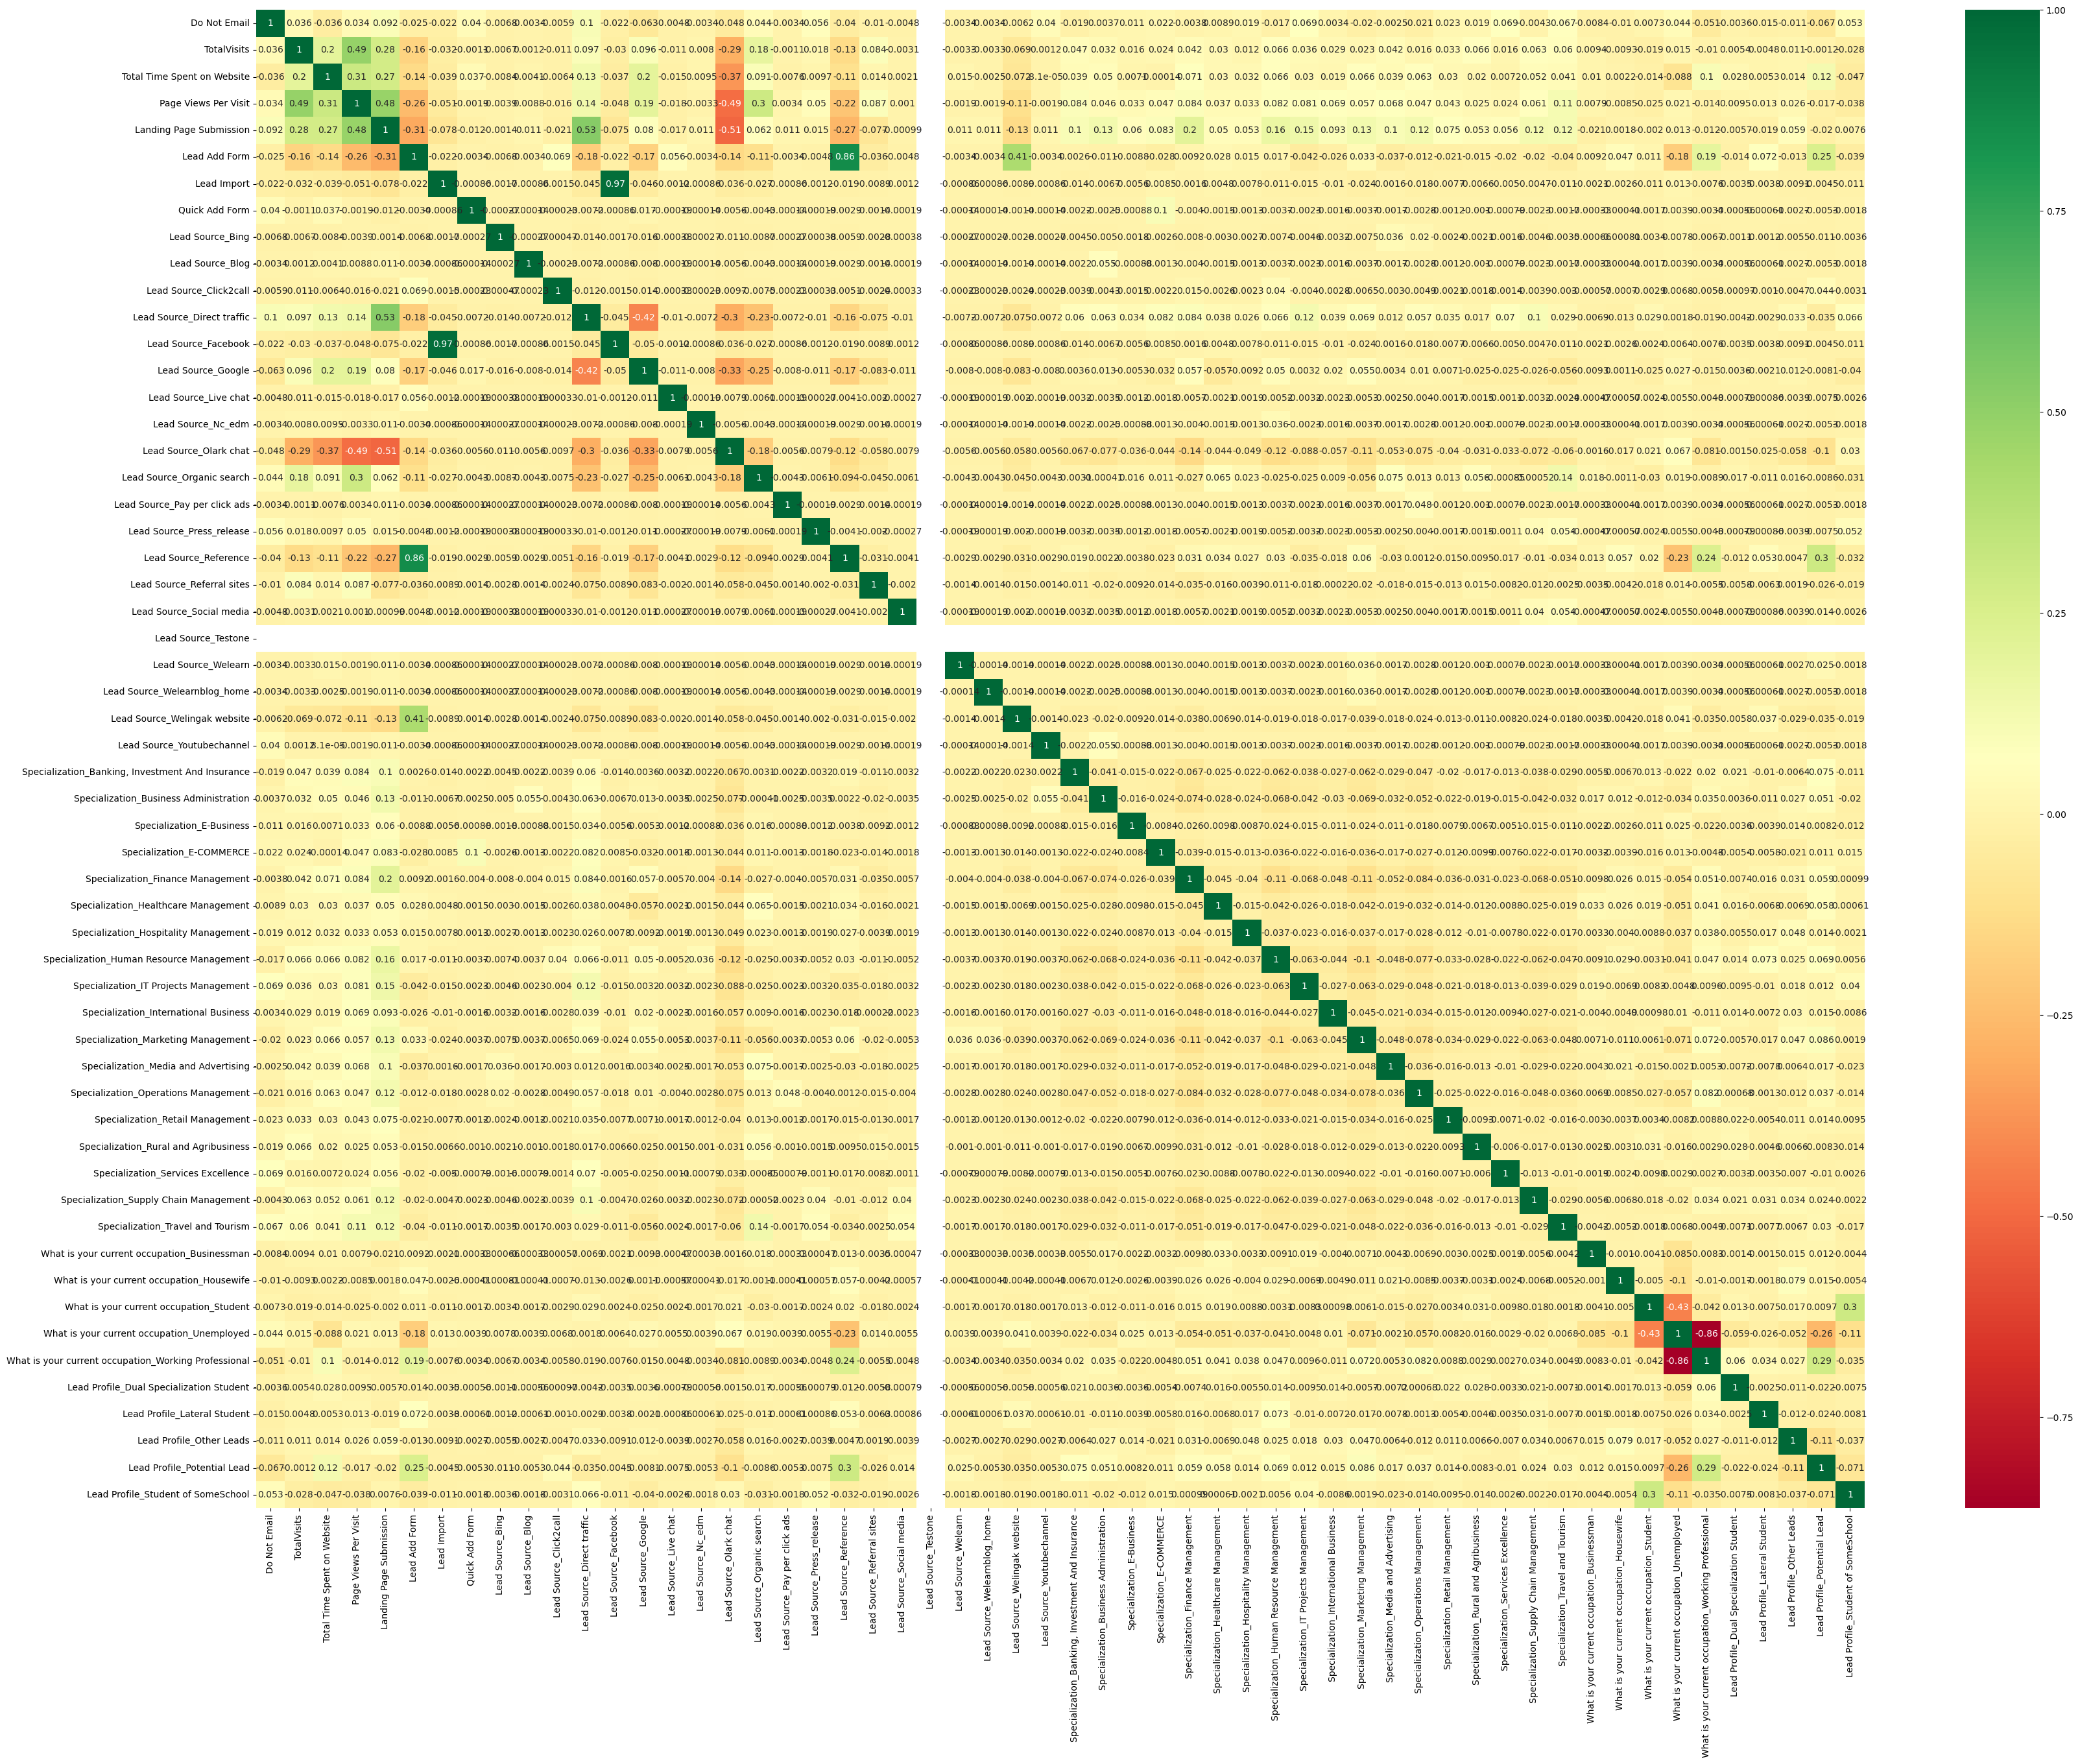

In [67]:
#check Correlation
plt.figure(figsize=(40,30))
sns.heatmap(X_train.corr(),annot = True, cmap = 'RdYlGn' )
plt.show()

- Inferences 
    1. Highest correlation is between 'Lead Import' and 'Lead Source_Facebook' - (0.96)
    2. correlation between Lead Add Form and Lead Source_Referance - (0.86)
    3. correlation between TotalVisits and Page Views per visits - (0.49)

## Step 7 : Model Building

In [68]:
# importing necessary libraries
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [69]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe = rfe.fit(X_train,y_train)

In [70]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True,  True, False,  True,  True, False,  True, False,
        True, False,  True,  True,  True, False,  True, False, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True])

In [71]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 21),
 ('Quick Add Form', False, 17),
 ('Lead Source_Bing', False, 20),
 ('Lead Source_Blog', False, 7),
 ('Lead Source_Click2call', True, 1),
 ('Lead Source_Direct traffic', False, 8),
 ('Lead Source_Facebook', False, 9),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Live chat', True, 1),
 ('Lead Source_Nc_edm', True, 1),
 ('Lead Source_Olark chat', True, 1),
 ('Lead Source_Organic search', False, 13),
 ('Lead Source_Pay per click ads', False, 18),
 ('Lead Source_Press_release', False, 10),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral sites', True, 1),
 ('Lead Source_Social media', False, 28),
 ('Lead Source_Testone', False, 29),
 ('Lead Source_Welearn', False, 22),
 ('Lead Source_Welearnblog_home', False, 11),
 ('Lead Source_Welingak we

In [72]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Landing Page Submission', 'Lead Add Form', 'Lead Source_Click2call',
       'Lead Source_Live chat', 'Lead Source_Nc_edm', 'Lead Source_Olark chat',
       'Lead Source_Referral sites', 'Lead Source_Welingak website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Dual Special

In [73]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Import', 'Quick Add Form',
       'Lead Source_Bing', 'Lead Source_Blog', 'Lead Source_Direct traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic search', 'Lead Source_Pay per click ads',
       'Lead Source_Press_release', 'Lead Source_Reference',
       'Lead Source_Social media', 'Lead Source_Testone',
       'Lead Source_Welearn', 'Lead Source_Welearnblog_home',
       'Lead Source_Youtubechannel', 'Specialization_E-Business',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_International Business',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student', 'Lead Profile_Other Leads'],
      dtype='object')

#### Model 1

In [74]:
X_trainsm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7363
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3167.4
Date:                Thu, 24 Aug 2023   Deviance:                       6334.7
Time:                        14:22:43   Pearson chi2:                 1.05e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3774
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7233      0.239     -3.022      0.003      -1.192      -0.254
Do Not Email                                            -0.3527      0.041     -8.558      0.000      -0.433      -0.272
Total Time Spent on Website                              1.1014      0.036     30.298      0.000       1.030       1.173
Landing Page Submission                                 -0.3043      0.091     -3.355      0.001      -0.482      -0.127
Lead Add Form                                            3.3152      0.196     16.926      0.000       2.931       3.699
Lead Source_Click2call                                  -2.7061      1.308     -2.069      0.039      -5.270      -0.142
Lead Source_Live chat                                   22.5076   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_Nc_edm                                      24.2491   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark chat                                   0.7599      0.107      7.124      0.000       0.551       0.969
Lead Source_Referral sites                              -0.4178      0.281     -1.488      0.137      -0.968       0.132
Lead Source_Welingak website                             2.8353      0.740      3.832      0.000       1.385       4.285
Specialization_Banking, Investment And Insurance         0.4859      0.176      2.767      0.006       0.142       0.830
Specialization_Business Administration                   0.2703      0.163      1.659      0.097      -0.049       0.590
Specialization_E-COMMERCE                                0.4270      0.284      1.505      0.132      -0.129       0.983
Specialization_Finance Management                        0.4108      0.114      3.615      0.000       0.188       0.634
Specialization_Hospitality Management                   -0.5243      0.305     -1.721      0.085      -1.121       0.073
Specialization_IT Projects Management                    0.4520      0.174      2.597      0.009       0.111       0.793
Specialization_Marketing Management                      0.2586      0.119      2.167      0.030       0.025       0.493
Specialization_Media and Advertising                     0.3201      0.214      1.494      0.135      -0.100       0.740
Specialization_Operations Management                     0.3854      0.148      2.612      0.009       0.096       0.675
Specialization_Rural and Agribusiness                    0.7273      0.344      2.112      0.035       0.052       1.402
What is your current occupation_Businessman             -1.1445      1.030     -1.111      0.267      -3.164       0.875
What is your current occupation_Housewife               23

In [75]:
#Drop columns which having High P values
col = col.drop('Lead Source_Live chat',1)

In [76]:
# Model 2

In [77]:
X_trainsm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7364
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3168.0
Date:                Thu, 24 Aug 2023   Deviance:                       6335.9
Time:                        14:22:43   Pearson chi2:                 1.05e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3773
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7237      0.239     -3.023      0.003      -1.193      -0.254
Do Not Email                                            -0.3531      0.041     -8.565      0.000      -0.434      -0.272
Total Time Spent on Website                              1.1013      0.036     30.296      0.000       1.030       1.173
Landing Page Submission                                 -0.3039      0.091     -3.351      0.001      -0.482      -0.126
Lead Add Form                                            3.3315      0.196     17.032      0.000       2.948       3.715
Lead Source_Click2call                                  -2.7216      1.308     -2.081      0.037      -5.285      -0.158
Lead Source_Nc_edm                                      24.2485   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark chat                                   0.7598      0.107      7.123      0.000       0.551       0.969
Lead Source_Referral sites                              -0.4178      0.281     -1.488      0.137      -0.968       0.132
Lead Source_Welingak website                             2.8190      0.740      3.810      0.000       1.369       4.269
Specialization_Banking, Investment And Insurance         0.4855      0.176      2.764      0.006       0.141       0.830
Specialization_Business Administration                   0.2699      0.163      1.656      0.098      -0.049       0.589
Specialization_E-COMMERCE                                0.4268      0.284      1.504      0.133      -0.129       0.983
Specialization_Finance Management                        0.4103      0.114      3.611      0.000       0.188       0.633
Specialization_Hospitality Management                   -0.5256      0.305     -1.725      0.085      -1.123       0.072
Specialization_IT Projects Management                    0.4517      0.174      2.596      0.009       0.111       0.793
Specialization_Marketing Management                      0.2579      0.119      2.161      0.031       0.024       0.492
Specialization_Media and Advertising                     0.3197      0.214      1.493      0.136      -0.100       0.740
Specialization_Operations Management                     0.3849      0.148      2.608      0.009       0.096       0.674
Specialization_Rural and Agribusiness                    0.7267      0.344      2.110      0.035       0.052       1.402
What is your current occupation_Businessman             -1.1447      1.031     -1.111      0.267      -3.165       0.875
What is your current occupation_Housewife               23.1611   2.12e+04      0.001      0.999   -4.15e+04    4.15e+04
What is your current occupation_Unemployed              -0

In [78]:
#Drop columns which having High P values
col = col.drop('Lead Source_Nc_edm',1)

In [79]:
# Model 3

In [80]:
X_trainsm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7365
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3169.1
Date:                Thu, 24 Aug 2023   Deviance:                       6338.1
Time:                        14:22:44   Pearson chi2:                 1.05e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3771
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7241      0.239     -3.025      0.002      -1.193      -0.255
Do Not Email                                            -0.3533      0.041     -8.572      0.000      -0.434      -0.273
Total Time Spent on Website                              1.1016      0.036     30.304      0.000       1.030       1.173
Landing Page Submission                                 -0.3014      0.091     -3.324      0.001      -0.479      -0.124
Lead Add Form                                            3.3321      0.196     17.036      0.000       2.949       3.715
Lead Source_Click2call                                  -2.7208      1.308     -2.080      0.038      -5.284      -0.157
Lead Source_Olark chat                                   0.7600      0.107      7.125      0.000       0.551       0.969
Lead Source_Referral sites                              -0.4183      0.281     -1.490      0.136      -0.969       0.132
Lead Source_Welingak website                             2.8185      0.740      3.810      0.000       1.368       4.269
Specialization_Banking, Investment And Insurance         0.4830      0.176      2.750      0.006       0.139       0.827
Specialization_Business Administration                   0.2674      0.163      1.641      0.101      -0.052       0.587
Specialization_E-COMMERCE                                0.4242      0.284      1.495      0.135      -0.132       0.980
Specialization_Finance Management                        0.4078      0.114      3.589      0.000       0.185       0.630
Specialization_Hospitality Management                   -0.5280      0.305     -1.732      0.083      -1.125       0.069
Specialization_IT Projects Management                    0.4492      0.174      2.581      0.010       0.108       0.790
Specialization_Marketing Management                      0.2555      0.119      2.141      0.032       0.022       0.489
Specialization_Media and Advertising                     0.3172      0.214      1.481      0.139      -0.103       0.737
Specialization_Operations Management                     0.3823      0.148      2.591      0.010       0.093       0.672
Specialization_Rural and Agribusiness                    0.7243      0.344      2.103      0.035       0.049       1.399
What is your current occupation_Businessman             -1.1439      1.031     -1.110      0.267      -3.164       0.876
What is your current occupation_Housewife               23.1597   2.12e+04      0.001      0.999   -4.15e+04    4.15e+04
What is your current occupation_Unemployed              -0.6609      0.231     -2.863      0.004      -1.113      -0.208
What is your current occupation_Working Professional     1

In [81]:
col = col.drop('What is your current occupation_Housewife',1)

In [82]:
# Model 4

In [83]:
X_trainsm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7366
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3173.0
Date:                Thu, 24 Aug 2023   Deviance:                       6346.1
Time:                        14:22:45   Pearson chi2:                 1.05e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3764
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6002      0.234     -2.566      0.010      -1.059      -0.142
Do Not Email                                            -0.3544      0.041     -8.598      0.000      -0.435      -0.274
Total Time Spent on Website                              1.1007      0.036     30.299      0.000       1.030       1.172
Landing Page Submission                                 -0.2966      0.091     -3.274      0.001      -0.474      -0.119
Lead Add Form                                            3.3384      0.195     17.084      0.000       2.955       3.721
Lead Source_Click2call                                  -2.7227      1.308     -2.082      0.037      -5.286      -0.159
Lead Source_Olark chat                                   0.7584      0.107      7.111      0.000       0.549       0.967
Lead Source_Referral sites                              -0.4175      0.281     -1.487      0.137      -0.968       0.133
Lead Source_Welingak website                             2.8125      0.740      3.802      0.000       1.362       4.262
Specialization_Banking, Investment And Insurance         0.4773      0.176      2.717      0.007       0.133       0.822
Specialization_Business Administration                   0.2649      0.163      1.628      0.103      -0.054       0.584
Specialization_E-COMMERCE                                0.4213      0.284      1.486      0.137      -0.134       0.977
Specialization_Finance Management                        0.4031      0.113      3.552      0.000       0.181       0.625
Specialization_Hospitality Management                   -0.5325      0.305     -1.747      0.081      -1.130       0.065
Specialization_IT Projects Management                    0.4450      0.174      2.558      0.011       0.104       0.786
Specialization_Marketing Management                      0.2509      0.119      2.103      0.035       0.017       0.485
Specialization_Media and Advertising                     0.3321      0.213      1.560      0.119      -0.085       0.749
Specialization_Operations Management                     0.3790      0.148      2.569      0.010       0.090       0.668
Specialization_Rural and Agribusiness                    0.7112      0.345      2.061      0.039       0.035       1.387
What is your current occupation_Businessman             -1.2657      1.029     -1.230      0.219      -3.283       0.751
What is your current occupation_Unemployed              -0.7852      0.225     -3.488      0.000      -1.227      -0.344
What is your current occupation_Working Professional     1.7869      0.282      6.339      0.000       1.234       2.339
Lead Profile_Dual Specialization Student                23

In [84]:
col = col.drop('Lead Profile_Dual Specialization Student',1)

In [85]:
# Model 5

In [86]:
X_trainsm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7367
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3185.3
Date:                Thu, 24 Aug 2023   Deviance:                       6370.6
Time:                        14:22:45   Pearson chi2:                 1.06e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3743
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5483      0.234     -2.347      0.019      -1.006      -0.090
Do Not Email                                            -0.3504      0.041     -8.548      0.000      -0.431      -0.270
Total Time Spent on Website                              1.1020      0.036     30.352      0.000       1.031       1.173
Landing Page Submission                                 -0.3001      0.090     -3.321      0.001      -0.477      -0.123
Lead Add Form                                            3.3291      0.195     17.053      0.000       2.946       3.712
Lead Source_Click2call                                  -2.7118      1.308     -2.073      0.038      -5.275      -0.148
Lead Source_Olark chat                                   0.7592      0.106      7.139      0.000       0.551       0.968
Lead Source_Referral sites                              -0.4264      0.281     -1.519      0.129      -0.977       0.124
Lead Source_Welingak website                             2.8109      0.740      3.800      0.000       1.361       4.261
Specialization_Banking, Investment And Insurance         0.4905      0.175      2.810      0.005       0.148       0.833
Specialization_Business Administration                   0.2684      0.162      1.655      0.098      -0.049       0.586
Specialization_E-COMMERCE                                0.4154      0.284      1.465      0.143      -0.140       0.971
Specialization_Finance Management                        0.3987      0.113      3.517      0.000       0.177       0.621
Specialization_Hospitality Management                   -0.5420      0.305     -1.777      0.076      -1.140       0.056
Specialization_IT Projects Management                    0.4380      0.174      2.518      0.012       0.097       0.779
Specialization_Marketing Management                      0.2443      0.119      2.049      0.040       0.011       0.478
Specialization_Media and Advertising                     0.3242      0.213      1.522      0.128      -0.093       0.742
Specialization_Operations Management                     0.3831      0.147      2.603      0.009       0.095       0.672
Specialization_Rural and Agribusiness                    0.7071      0.344      2.055      0.040       0.033       1.382
What is your current occupation_Businessman             -1.3119      1.028     -1.276      0.202      -3.328       0.704
What is your current occupation_Unemployed              -0.8270      0.225     -3.675      0.000      -1.268      -0.386
What is your current occupation_Working Professional     1.7655      0.281      6.275      0.000       1.214       2.317
Lead Profile_Lateral Student                             2

In [87]:
col = col.drop('What is your current occupation_Businessman',1)

In [88]:
# Model 6

In [89]:
X_trainsm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7368
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3186.1
Date:                Thu, 24 Aug 2023   Deviance:                       6372.2
Time:                        14:22:45   Pearson chi2:                 1.06e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3742
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6079      0.229     -2.658      0.008      -1.056      -0.160
Do Not Email                                            -0.3500      0.041     -8.539      0.000      -0.430      -0.270
Total Time Spent on Website                              1.1011      0.036     30.342      0.000       1.030       1.172
Landing Page Submission                                 -0.2964      0.090     -3.284      0.001      -0.473      -0.119
Lead Add Form                                            3.3302      0.195     17.059      0.000       2.948       3.713
Lead Source_Click2call                                  -2.7112      1.308     -2.073      0.038      -5.275      -0.148
Lead Source_Olark chat                                   0.7599      0.106      7.145      0.000       0.551       0.968
Lead Source_Referral sites                              -0.4249      0.281     -1.514      0.130      -0.975       0.125
Lead Source_Welingak website                             2.8104      0.740      3.799      0.000       1.361       4.260
Specialization_Banking, Investment And Insurance         0.4905      0.174      2.812      0.005       0.149       0.832
Specialization_Business Administration                   0.2651      0.162      1.637      0.102      -0.052       0.582
Specialization_E-COMMERCE                                0.4138      0.284      1.460      0.144      -0.142       0.969
Specialization_Finance Management                        0.3993      0.113      3.525      0.000       0.177       0.621
Specialization_Hospitality Management                   -0.5417      0.305     -1.777      0.075      -1.139       0.056
Specialization_IT Projects Management                    0.4301      0.174      2.471      0.013       0.089       0.771
Specialization_Marketing Management                      0.2436      0.119      2.044      0.041       0.010       0.477
Specialization_Media and Advertising                     0.3247      0.213      1.525      0.127      -0.093       0.742
Specialization_Operations Management                     0.3821      0.147      2.597      0.009       0.094       0.670
Specialization_Rural and Agribusiness                    0.7103      0.344      2.066      0.039       0.037       1.384
What is your current occupation_Unemployed              -0.7688      0.220     -3.493      0.000      -1.200      -0.337
What is your current occupation_Working Professional     1.8229      0.278      6.568      0.000       1.279       2.367
Lead Profile_Lateral Student                             2.7920      1.076      2.595      0.009       0.683       4.901
Lead Profile_Potential Lead                              1

In [90]:
col = col.drop('Specialization_E-COMMERCE',1)

In [91]:
# model 7
X_trainsm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7369
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3187.1
Date:                Thu, 24 Aug 2023   Deviance:                       6374.3
Time:                        14:22:46   Pearson chi2:                 1.06e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3740
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6095      0.229     -2.667      0.008      -1.057      -0.161
Do Not Email                                            -0.3497      0.041     -8.543      0.000      -0.430      -0.269
Total Time Spent on Website                              1.0995      0.036     30.339      0.000       1.028       1.171
Landing Page Submission                                 -0.2808      0.090     -3.137      0.002      -0.456      -0.105
Lead Add Form                                            3.3271      0.195     17.052      0.000       2.945       3.710
Lead Source_Click2call                                  -2.7109      1.308     -2.073      0.038      -5.274      -0.148
Lead Source_Olark chat                                   0.7569      0.106      7.123      0.000       0.549       0.965
Lead Source_Referral sites                              -0.4291      0.281     -1.529      0.126      -0.979       0.121
Lead Source_Welingak website                             2.8080      0.740      3.796      0.000       1.358       4.258
Specialization_Banking, Investment And Insurance         0.4726      0.174      2.718      0.007       0.132       0.813
Specialization_Business Administration                   0.2473      0.161      1.532      0.125      -0.069       0.564
Specialization_Finance Management                        0.3813      0.113      3.389      0.001       0.161       0.602
Specialization_Hospitality Management                   -0.5581      0.304     -1.833      0.067      -1.155       0.039
Specialization_IT Projects Management                    0.4115      0.174      2.371      0.018       0.071       0.752
Specialization_Marketing Management                      0.2267      0.119      1.911      0.056      -0.006       0.459
Specialization_Media and Advertising                     0.3068      0.212      1.444      0.149      -0.110       0.723
Specialization_Operations Management                     0.3645      0.147      2.487      0.013       0.077       0.652
Specialization_Rural and Agribusiness                    0.6937      0.343      2.020      0.043       0.021       1.367
What is your current occupation_Unemployed              -0.7633      0.220     -3.471      0.001      -1.194      -0.332
What is your current occupation_Working Professional     1.8323      0.277      6.605      0.000       1.289       2.376
Lead Profile_Lateral Student                             2.7850      1.076      2.588      0.010       0.676       4.894
Lead Profile_Potential Lead                              1.6925      0.089     19.103      0.000       1.519       1.866
Lead Profile_Student of SomeSchool                      -2

In [92]:
col = col.drop('Specialization_Media and Advertising',1)

In [93]:
#model 8
X_trainsm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7370
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3188.2
Date:                Thu, 24 Aug 2023   Deviance:                       6376.3
Time:                        14:22:46   Pearson chi2:                 1.06e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3738
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6021      0.228     -2.638      0.008      -1.050      -0.155
Do Not Email                                            -0.3501      0.041     -8.559      0.000      -0.430      -0.270
Total Time Spent on Website                              1.0999      0.036     30.356      0.000       1.029       1.171
Landing Page Submission                                 -0.2614      0.088     -2.955      0.003      -0.435      -0.088
Lead Add Form                                            3.3274      0.195     17.059      0.000       2.945       3.710
Lead Source_Click2call                                  -2.7100      1.308     -2.072      0.038      -5.274      -0.146
Lead Source_Olark chat                                   0.7571      0.106      7.127      0.000       0.549       0.965
Lead Source_Referral sites                              -0.4343      0.281     -1.548      0.122      -0.984       0.116
Lead Source_Welingak website                             2.8045      0.740      3.792      0.000       1.355       4.254
Specialization_Banking, Investment And Insurance         0.4507      0.173      2.602      0.009       0.111       0.790
Specialization_Business Administration                   0.2250      0.161      1.401      0.161      -0.090       0.540
Specialization_Finance Management                        0.3590      0.111      3.222      0.001       0.141       0.577
Specialization_Hospitality Management                   -0.5792      0.304     -1.905      0.057      -1.175       0.017
Specialization_IT Projects Management                    0.3889      0.173      2.250      0.024       0.050       0.728
Specialization_Marketing Management                      0.2055      0.118      1.747      0.081      -0.025       0.436
Specialization_Operations Management                     0.3426      0.146      2.351      0.019       0.057       0.628
Specialization_Rural and Agribusiness                    0.6727      0.343      1.961      0.050       0.000       1.345
What is your current occupation_Unemployed              -0.7665      0.220     -3.490      0.000      -1.197      -0.336
What is your current occupation_Working Professional     1.8354      0.277      6.621      0.000       1.292       2.379
Lead Profile_Lateral Student                             2.7761      1.076      2.580      0.010       0.667       4.885
Lead Profile_Potential Lead                              1.6963      0.089     19.161      0.000       1.523       1.870
Lead Profile_Student of SomeSchool                      -2.4315      0.429     -5.668      0.000      -3.272      -1.591
==========================================================

In [94]:
col = col.drop('Specialization_Business Administration',1)

In [95]:
#model 9
X_trainsm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
resq = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7370
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3188.2
Date:                Thu, 24 Aug 2023   Deviance:                       6376.3
Time:                        14:22:46   Pearson chi2:                 1.06e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3738
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6021      0.228     -2.638      0.008      -1.050      -0.155
Do Not Email                                            -0.3501      0.041     -8.559      0.000      -0.430      -0.270
Total Time Spent on Website                              1.0999      0.036     30.356      0.000       1.029       1.171
Landing Page Submission                                 -0.2614      0.088     -2.955      0.003      -0.435      -0.088
Lead Add Form                                            3.3274      0.195     17.059      0.000       2.945       3.710
Lead Source_Click2call                                  -2.7100      1.308     -2.072      0.038      -5.274      -0.146
Lead Source_Olark chat                                   0.7571      0.106      7.127      0.000       0.549       0.965
Lead Source_Referral sites                              -0.4343      0.281     -1.548      0.122      -0.984       0.116
Lead Source_Welingak website                             2.8045      0.740      3.792      0.000       1.355       4.254
Specialization_Banking, Investment And Insurance         0.4507      0.173      2.602      0.009       0.111       0.790
Specialization_Business Administration                   0.2250      0.161      1.401      0.161      -0.090       0.540
Specialization_Finance Management                        0.3590      0.111      3.222      0.001       0.141       0.577
Specialization_Hospitality Management                   -0.5792      0.304     -1.905      0.057      -1.175       0.017
Specialization_IT Projects Management                    0.3889      0.173      2.250      0.024       0.050       0.728
Specialization_Marketing Management                      0.2055      0.118      1.747      0.081      -0.025       0.436
Specialization_Operations Management                     0.3426      0.146      2.351      0.019       0.057       0.628
Specialization_Rural and Agribusiness                    0.6727      0.343      1.961      0.050       0.000       1.345
What is your current occupation_Unemployed              -0.7665      0.220     -3.490      0.000      -1.197      -0.336
What is your current occupation_Working Professional     1.8354      0.277      6.621      0.000       1.292       2.379
Lead Profile_Lateral Student                             2.7761      1.076      2.580      0.010       0.667       4.885
Lead Profile_Potential Lead                              1.6963      0.089     19.161      0.000       1.523       1.870
Lead Profile_Student of SomeSchool                      -2.4315      0.429     -5.668      0.000      -3.272      -1.591
==========================================================

In [96]:
#col = col.drop('Specialization_Business Administration',1)

KeyError: "['Specialization_Business Administration'] not found in axis"

In [97]:
#model 10
X_trainsm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3189.1
Date:                Thu, 24 Aug 2023   Deviance:                       6378.3
Time:                        14:23:19   Pearson chi2:                 1.06e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3737
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5924      0.228     -2.598      0.009      -1.039      -0.146
Do Not Email                                            -0.3504      0.041     -8.563      0.000      -0.431      -0.270
Total Time Spent on Website                              1.1004      0.036     30.373      0.000       1.029       1.171
Landing Page Submission                                 -0.2380      0.087     -2.742      0.006      -0.408      -0.068
Lead Add Form                                            3.3296      0.195     17.084      0.000       2.948       3.712
Lead Source_Click2call                                  -2.7110      1.308     -2.072      0.038      -5.275      -0.147
Lead Source_Olark chat                                   0.7575      0.106      7.137      0.000       0.549       0.966
Lead Source_Referral sites                              -0.4387      0.280     -1.565      0.118      -0.988       0.111
Lead Source_Welingak website                             2.8002      0.740      3.786      0.000       1.351       4.250
Specialization_Banking, Investment And Insurance         0.4245      0.172      2.466      0.014       0.087       0.762
Specialization_Finance Management                        0.3325      0.110      3.029      0.002       0.117       0.548
Specialization_Hospitality Management                   -0.6036      0.303     -1.990      0.047      -1.198      -0.009
Specialization_IT Projects Management                    0.3621      0.172      2.108      0.035       0.025       0.699
Specialization_Marketing Management                      0.1804      0.116      1.553      0.121      -0.047       0.408
Specialization_Operations Management                     0.3167      0.144      2.192      0.028       0.033       0.600
Specialization_Rural and Agribusiness                    0.6476      0.343      1.890      0.059      -0.024       1.319
What is your current occupation_Unemployed              -0.7717      0.219     -3.517      0.000      -1.202      -0.342
What is your current occupation_Working Professional     1.8301      0.277      6.609      0.000       1.287       2.373
Lead Profile_Lateral Student                             2.7656      1.076      2.570      0.010       0.656       4.875
Lead Profile_Potential Lead                              1.7013      0.088     19.231      0.000       1.528       1.875
Lead Profile_Student of SomeSchool                      -2.4368      0.429     -5.680      0.000      -3.278      -1.596
========================================================================================================================
"""

In [98]:
col = col.drop('Specialization_Marketing Management',1)

In [99]:
# Model 11
X_trainsm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3190.3
Date:                Thu, 24 Aug 2023   Deviance:                       6380.7
Time:                        14:23:57   Pearson chi2:                 1.05e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3735
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5883      0.228     -2.582      0.010      -1.035      -0.142
Do Not Email                                            -0.3517      0.041     -8.593      0.000      -0.432      -0.271
Total Time Spent on Website                              1.1019      0.036     30.418      0.000       1.031       1.173
Landing Page Submission                                 -0.2108      0.085     -2.483      0.013      -0.377      -0.044
Lead Add Form                                            3.3390      0.195     17.165      0.000       2.958       3.720
Lead Source_Click2call                                  -2.7209      1.309     -2.079      0.038      -5.286      -0.156
Lead Source_Olark chat                                   0.7562      0.106      7.131      0.000       0.548       0.964
Lead Source_Referral sites                              -0.4415      0.280     -1.577      0.115      -0.990       0.107
Lead Source_Welingak website                             2.7844      0.740      3.765      0.000       1.335       4.234
Specialization_Banking, Investment And Insurance         0.3906      0.171      2.288      0.022       0.056       0.725
Specialization_Finance Management                        0.2982      0.107      2.775      0.006       0.088       0.509
Specialization_Hospitality Management                   -0.6369      0.302     -2.105      0.035      -1.230      -0.044
Specialization_IT Projects Management                    0.3275      0.170      1.922      0.055      -0.006       0.661
Specialization_Operations Management                     0.2827      0.143      1.980      0.048       0.003       0.563
Specialization_Rural and Agribusiness                    0.6158      0.342      1.800      0.072      -0.055       1.286
What is your current occupation_Unemployed              -0.7675      0.219     -3.500      0.000      -1.197      -0.338
What is your current occupation_Working Professional     1.8422      0.277      6.660      0.000       1.300       2.384
Lead Profile_Lateral Student                             2.7502      1.077      2.555      0.011       0.640       4.860
Lead Profile_Potential Lead                              1.7077      0.088     19.341      0.000       1.535       1.881
Lead Profile_Student of SomeSchool                      -2.4401      0.429     -5.683      0.000      -3.282      -1.598
========================================================================================================================
"""

In [100]:
col = col.drop('Lead Source_Referral sites',1)

In [101]:
# Model 12
X_trainsm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7373
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3191.6
Date:                Thu, 24 Aug 2023   Deviance:                       6383.3
Time:                        14:24:08   Pearson chi2:                 1.05e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3733
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6072      0.228     -2.667      0.008      -1.053      -0.161
Do Not Email                                            -0.3513      0.041     -8.587      0.000      -0.431      -0.271
Total Time Spent on Website                              1.1023      0.036     30.429      0.000       1.031       1.173
Landing Page Submission                                 -0.1905      0.084     -2.268      0.023      -0.355      -0.026
Lead Add Form                                            3.3620      0.194     17.324      0.000       2.982       3.742
Lead Source_Click2call                                  -2.7226      1.309     -2.081      0.037      -5.287      -0.158
Lead Source_Olark chat                                   0.7796      0.105      7.416      0.000       0.574       0.986
Lead Source_Welingak website                             2.7851      0.740      3.766      0.000       1.336       4.234
Specialization_Banking, Investment And Insurance         0.3904      0.171      2.288      0.022       0.056       0.725
Specialization_Finance Management                        0.3008      0.107      2.798      0.005       0.090       0.511
Specialization_Hospitality Management                   -0.6326      0.302     -2.092      0.036      -1.225      -0.040
Specialization_IT Projects Management                    0.3287      0.170      1.929      0.054      -0.005       0.663
Specialization_Operations Management                     0.2823      0.143      1.977      0.048       0.002       0.562
Specialization_Rural and Agribusiness                    0.6090      0.341      1.786      0.074      -0.059       1.277
What is your current occupation_Unemployed              -0.7720      0.219     -3.520      0.000      -1.202      -0.342
What is your current occupation_Working Professional     1.8363      0.277      6.637      0.000       1.294       2.379
Lead Profile_Lateral Student                             2.7592      1.077      2.563      0.010       0.649       4.869
Lead Profile_Potential Lead                              1.7092      0.088     19.361      0.000       1.536       1.882
Lead Profile_Student of SomeSchool                      -2.4363      0.429     -5.674      0.000      -3.278      -1.595
========================================================================================================================
"""

In [102]:
col = col.drop('Specialization_Rural and Agribusiness',1)

In [103]:
# Model 13
X_trainsm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3193.2
Date:                Thu, 24 Aug 2023   Deviance:                       6386.4
Time:                        14:24:30   Pearson chi2:                 1.05e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3730
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5882      0.227     -2.591      0.010      -1.033      -0.143
Do Not Email                                            -0.3509      0.041     -8.578      0.000      -0.431      -0.271
Total Time Spent on Website                              1.1021      0.036     30.437      0.000       1.031       1.173
Landing Page Submission                                 -0.1815      0.084     -2.166      0.030      -0.346      -0.017
Lead Add Form                                            3.3645      0.194     17.344      0.000       2.984       3.745
Lead Source_Click2call                                  -2.7218      1.309     -2.080      0.038      -5.287      -0.157
Lead Source_Olark chat                                   0.7791      0.105      7.414      0.000       0.573       0.985
Lead Source_Welingak website                             2.7795      0.739      3.759      0.000       1.330       4.229
Specialization_Banking, Investment And Insurance         0.3801      0.170      2.230      0.026       0.046       0.714
Specialization_Finance Management                        0.2899      0.107      2.702      0.007       0.080       0.500
Specialization_Hospitality Management                   -0.6427      0.302     -2.126      0.034      -1.235      -0.050
Specialization_IT Projects Management                    0.3179      0.170      1.867      0.062      -0.016       0.652
Specialization_Operations Management                     0.2721      0.143      1.907      0.056      -0.008       0.552
What is your current occupation_Unemployed              -0.7883      0.219     -3.603      0.000      -1.217      -0.359
What is your current occupation_Working Professional     1.8218      0.276      6.597      0.000       1.281       2.363
Lead Profile_Lateral Student                             2.7545      1.077      2.558      0.011       0.644       4.865
Lead Profile_Potential Lead                              1.7076      0.088     19.345      0.000       1.535       1.881
Lead Profile_Student of SomeSchool                      -2.4476      0.429     -5.700      0.000      -3.289      -1.606
========================================================================================================================
"""

In [104]:
col = col.drop('Specialization_IT Projects Management',1)

In [105]:
# Model 14
X_trainsm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7375
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3194.9
Date:                Thu, 24 Aug 2023   Deviance:                       6389.8
Time:                        14:24:42   Pearson chi2:                 1.05e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3727
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5863      0.227     -2.585      0.010      -1.031      -0.142
Do Not Email                                            -0.3488      0.041     -8.525      0.000      -0.429      -0.269
Total Time Spent on Website                              1.1007      0.036     30.425      0.000       1.030       1.172
Landing Page Submission                                 -0.1605      0.083     -1.935      0.053      -0.323       0.002
Lead Add Form                                            3.3599      0.194     17.333      0.000       2.980       3.740
Lead Source_Click2call                                  -2.7173      1.309     -2.076      0.038      -5.282      -0.152
Lead Source_Olark chat                                   0.7746      0.105      7.378      0.000       0.569       0.980
Lead Source_Welingak website                             2.7766      0.739      3.755      0.000       1.327       4.226
Specialization_Banking, Investment And Insurance         0.3566      0.170      2.099      0.036       0.024       0.690
Specialization_Finance Management                        0.2660      0.106      2.499      0.012       0.057       0.475
Specialization_Hospitality Management                   -0.6644      0.302     -2.201      0.028      -1.256      -0.073
Specialization_Operations Management                     0.2488      0.142      1.752      0.080      -0.029       0.527
What is your current occupation_Unemployed              -0.7843      0.219     -3.588      0.000      -1.213      -0.356
What is your current occupation_Working Professional     1.8270      0.276      6.622      0.000       1.286       2.368
Lead Profile_Lateral Student                             2.7458      1.077      2.550      0.011       0.635       4.856
Lead Profile_Potential Lead                              1.7114      0.088     19.393      0.000       1.538       1.884
Lead Profile_Student of SomeSchool                      -2.4407      0.430     -5.680      0.000      -3.283      -1.598
========================================================================================================================
"""

In [106]:
col = col.drop('Specialization_Operations Management',1)

In [107]:
# Model 15
X_trainsm = sm.add_constant(X_train[col])
logm15 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3196.4
Date:                Thu, 24 Aug 2023   Deviance:                       6392.9
Time:                        14:25:01   Pearson chi2:                 1.06e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3724
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5928      0.227     -2.616      0.009      -1.037      -0.149
Do Not Email                                            -0.3515      0.041     -8.594      0.000      -0.432      -0.271
Total Time Spent on Website                              1.1021      0.036     30.474      0.000       1.031       1.173
Landing Page Submission                                 -0.1388      0.082     -1.694      0.090      -0.299       0.022
Lead Add Form                                            3.3636      0.194     17.360      0.000       2.984       3.743
Lead Source_Click2call                                  -2.7161      1.309     -2.075      0.038      -5.282      -0.150
Lead Source_Olark chat                                   0.7763      0.105      7.401      0.000       0.571       0.982
Lead Source_Welingak website                             2.7717      0.739      3.748      0.000       1.322       4.221
Specialization_Banking, Investment And Insurance         0.3329      0.169      1.966      0.049       0.001       0.665
Specialization_Finance Management                        0.2418      0.106      2.291      0.022       0.035       0.449
Specialization_Hospitality Management                   -0.6877      0.301     -2.281      0.023      -1.279      -0.097
What is your current occupation_Unemployed              -0.7740      0.218     -3.546      0.000      -1.202      -0.346
What is your current occupation_Working Professional     1.8477      0.275      6.709      0.000       1.308       2.387
Lead Profile_Lateral Student                             2.7402      1.076      2.546      0.011       0.631       4.850
Lead Profile_Potential Lead                              1.7124      0.088     19.414      0.000       1.540       1.885
Lead Profile_Student of SomeSchool                      -2.4430      0.430     -5.679      0.000      -3.286      -1.600
========================================================================================================================
"""

In [108]:
col = col.drop('Landing Page Submission',1)

In [109]:
# Model 16
X_trainsm = sm.add_constant(X_train[col])
logm16 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm16.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3197.9
Date:                Thu, 24 Aug 2023   Deviance:                       6395.7
Time:                        14:25:10   Pearson chi2:                 1.05e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3722
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6921      0.219     -3.161      0.002      -1.121      -0.263
Do Not Email                                            -0.3546      0.041     -8.690      0.000      -0.435      -0.275
Total Time Spent on Website                              1.1009      0.036     30.456      0.000       1.030       1.172
Lead Add Form                                            3.4594      0.186     18.647      0.000       3.096       3.823
Lead Source_Click2call                                  -2.7020      1.310     -2.063      0.039      -5.269      -0.135
Lead Source_Olark chat                                   0.8690      0.090      9.659      0.000       0.693       1.045
Lead Source_Welingak website                             2.7686      0.739      3.744      0.000       1.319       4.218
Specialization_Banking, Investment And Insurance         0.3017      0.168      1.797      0.072      -0.027       0.631
Specialization_Finance Management                        0.2071      0.103      2.005      0.045       0.005       0.410
Specialization_Hospitality Management                   -0.7105      0.301     -2.364      0.018      -1.299      -0.121
What is your current occupation_Unemployed              -0.7667      0.218     -3.514      0.000      -1.194      -0.339
What is your current occupation_Working Professional     1.8438      0.275      6.697      0.000       1.304       2.383
Lead Profile_Lateral Student                             2.7565      1.077      2.559      0.010       0.646       4.867
Lead Profile_Potential Lead                              1.7069      0.088     19.379      0.000       1.534       1.880
Lead Profile_Student of SomeSchool                      -2.4433      0.430     -5.685      0.000      -3.286      -1.601
========================================================================================================================
"""

In [110]:
col = col.drop('Specialization_Banking, Investment And Insurance',1)

In [111]:
# Model 17
X_trainsm = sm.add_constant(X_train[col])
logm17 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm17.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3199.5
Date:                Thu, 24 Aug 2023   Deviance:                       6398.9
Time:                        14:25:22   Pearson chi2:                 1.06e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3719
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6761      0.218     -3.098      0.002      -1.104      -0.248
Do Not Email                                            -0.3565      0.041     -8.730      0.000      -0.436      -0.276
Total Time Spent on Website                              1.1007      0.036     30.465      0.000       1.030       1.172
Lead Add Form                                            3.4495      0.185     18.611      0.000       3.086       3.813
Lead Source_Click2call                                  -2.7095      1.310     -2.069      0.039      -5.277      -0.142
Lead Source_Olark chat                                   0.8567      0.090      9.562      0.000       0.681       1.032
Lead Source_Welingak website                             2.7650      0.740      3.739      0.000       1.316       4.214
Specialization_Finance Management                        0.1921      0.103      1.865      0.062      -0.010       0.394
Specialization_Hospitality Management                   -0.7245      0.300     -2.412      0.016      -1.313      -0.136
What is your current occupation_Unemployed              -0.7686      0.218     -3.531      0.000      -1.195      -0.342
What is your current occupation_Working Professional     1.8380      0.275      6.687      0.000       1.299       2.377
Lead Profile_Lateral Student                             2.7474      1.077      2.551      0.011       0.636       4.858
Lead Profile_Potential Lead                              1.7158      0.088     19.506      0.000       1.543       1.888
Lead Profile_Student of SomeSchool                      -2.4455      0.430     -5.688      0.000      -3.288      -1.603
========================================================================================================================
"""

In [112]:
col = col.drop('Specialization_Finance Management',1)

In [113]:
# Model 18
X_trainsm = sm.add_constant(X_train[col])
logm18 = sm.GLM(y_train,X_trainsm,family = sm.families.Binomial())
res = logm18.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3201.2
Date:                Thu, 24 Aug 2023   Deviance:                       6402.4
Time:                        14:25:30   Pearson chi2:                 1.07e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3716
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6390      0.217     -2.946      0.003      -1.064      -0.214
Do Not Email                                            -0.3580      0.041     -8.763      0.000      -0.438      -0.278
Total Time Spent on Website                              1.1005      0.036     30.485      0.000       1.030       1.171
Lead Add Form                                            3.4340      0.185     18.568      0.000       3.072       3.797
Lead Source_Click2call                                  -2.6434      1.314     -2.012      0.044      -5.218      -0.069
Lead Source_Olark chat                                   0.8365      0.089      9.421      0.000       0.662       1.011
Lead Source_Welingak website                             2.7576      0.740      3.729      0.000       1.308       4.207
Specialization_Hospitality Management                   -0.7487      0.300     -2.494      0.013      -1.337      -0.160
What is your current occupation_Unemployed              -0.7821      0.217     -3.601      0.000      -1.208      -0.356
What is your current occupation_Working Professional     1.8335      0.275      6.678      0.000       1.295       2.372
Lead Profile_Lateral Student                             2.7712      1.081      2.564      0.010       0.653       4.890
Lead Profile_Potential Lead                              1.7203      0.088     19.563      0.000       1.548       1.893
Lead Profile_Student of SomeSchool                      -2.4538      0.431     -5.699      0.000      -3.298      -1.610
========================================================================================================================
"""

- Model 18 has a stable with significant p-values  

#### Calculating VIF

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' ,ascending= False)
vif

,Features,VIF
2,Lead Add Form,1.56
7,What is your current occupation_Unemployed,1.51
4,Lead Source_Olark chat,1.48
10,Lead Profile_Potential Lead,1.42
5,Lead Source_Welingak website,1.27
8,What is your current occupation_Working Profes...,1.26
1,Total Time Spent on Website,1.24
0,Do Not Email,1.02
6,Specialization_Hospitality Management,1.02
11,Lead Profile_Student of SomeSchool,1.02


- All Variables have good VIF value 

In [115]:
# Predicting a train model
y_train_pred = res.predict(X_trainsm)
y_train_pred[:10]

7263    0.189453
6468    0.117956
7833    0.106134
4461    0.709416
8453    0.189453
7094    0.996797
7932    0.189453
449     0.980190
5382    0.649861
3768    0.189453
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18945251, 0.11795624, 0.10613449, 0.70941593, 0.18945251,
       0.99679671, 0.18945251, 0.9801904 , 0.64986087, 0.18945251])

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.189453,7263
1,0,0.117956,6468
2,1,0.106134,7833
3,0,0.709416,4461
4,0,0.189453,8453


In [118]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x :1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.189453,7263,0
1,0,0.117956,6468,0
2,1,0.106134,7833,0
3,0,0.709416,4461,1
4,0,0.189453,8453,0


In [119]:
from sklearn import metrics
 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[4014  549]
 [ 932 1897]]


In [120]:
#lets check overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.7996482683982684


### Plotting ROC Curve

In [121]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def draw_curve(actual,prob):
    fpr , tpr, thresholds = metrics.roc_curve(actual, prob, drop_intermediate = False)
    
    auc_score = roc_auc_score(actual,prob)
    plt.figure(figsize=(10,5))
    plt.plot(fpr ,tpr ,label = 'ROC curve(area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0 ,1.0])
    plt.ylim([0.0 ,1.05])
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return None

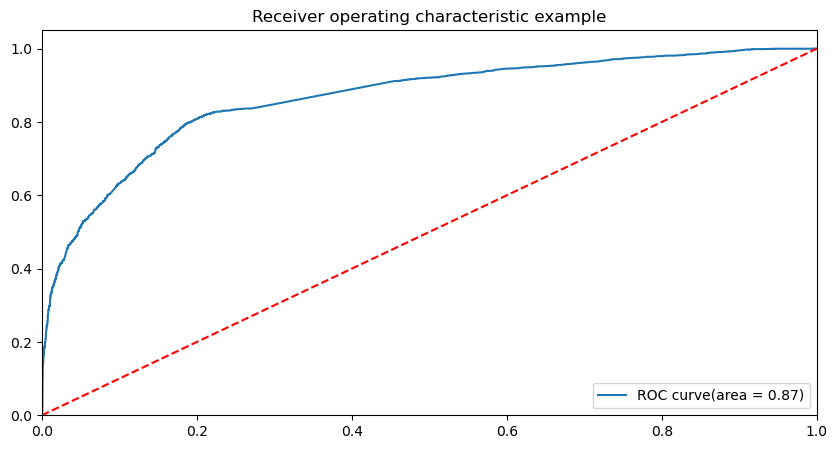

In [122]:
draw_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

- The value of ROC Curve should be near to 1 and we are getting 0.87 which is good predictive model

#### Finding optimal Cutoff Point

In [123]:
# creating columns for different probability cutoff
number = [float(x)/10 for x in range(10)]
for i in number:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.189453,7263,0,1,1,0,0,0,0,0,0,0,0
1,0,0.117956,6468,0,1,1,0,0,0,0,0,0,0,0
2,1,0.106134,7833,0,1,1,0,0,0,0,0,0,0,0
3,0,0.709416,4461,1,1,1,1,1,1,1,1,1,0,0
4,0,0.189453,8453,0,1,1,0,0,0,0,0,0,0,0


In [124]:
# calculate accuracy sesitivity and specificity for various cutoff
df_cutoff = pd.DataFrame(columns = ['prob' ,'accuracy', 'sensi', 'speci'])

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    df_cutoff.loc[i] = [i ,accuracy,sensi,speci]
print(df_cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.382711  1.000000  0.000000
0.1   0.1  0.484307  0.981972  0.175762
0.2   0.2  0.777192  0.835984  0.740741
0.3   0.3  0.804518  0.803818  0.804953
0.4   0.4  0.804654  0.750088  0.838483
0.5   0.5  0.799648  0.670555  0.879684
0.6   0.6  0.791126  0.574054  0.925707
0.7   0.7  0.778139  0.494521  0.953978
0.8   0.8  0.753517  0.387770  0.980276
0.9   0.9  0.725108  0.296925  0.990576


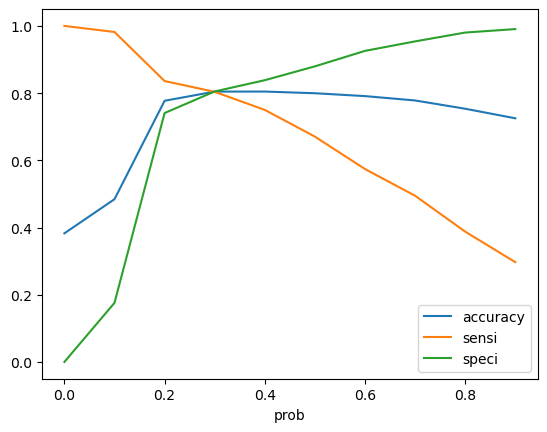

In [125]:
# lets plot accuracy sensitivity and specificity for various probabilities
df_cutoff.plot.line(x = 'prob',y=['accuracy','sensi','speci'])
plt.show()

- From above graph the optimal cutoff is 0.3

In [126]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted.map(lambda x : 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.189453,7263,0,1,1,0,0,0,0,0,0,0,0,1
1,0,0.117956,6468,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.106134,7833,0,1,1,0,0,0,0,0,0,0,0,1
3,0,0.709416,4461,1,1,1,1,1,1,1,1,1,0,0,0
4,0,0.189453,8453,0,1,1,0,0,0,0,0,0,0,0,0


In [127]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_prob.map(lambda x : round(x*100))

y_train_pred_final[['Converted', 'Converted_prob','Prospect ID', 'final_Predicted','Lead Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead Score
0,1,0.189453,7263,1,19
1,0,0.117956,6468,0,12
2,1,0.106134,7833,1,11
3,0,0.709416,4461,0,71
4,0,0.189453,8453,0,19


In [128]:
# Precision And Recall 

In [152]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score ,recall_score

In [130]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


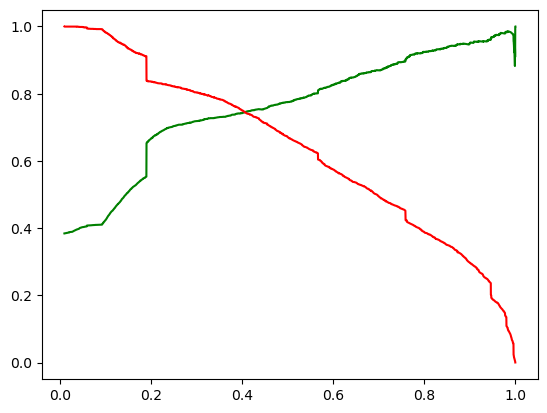

In [131]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions On Test Set

In [132]:
num_cols = X_test.select_dtypes(include=['float64','int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Lead Source_Bing,Lead Source_Blog,...,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
4269,-0.29614,1.441722,0.909637,2.793291,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2376,-0.29614,-1.003714,-0.910458,-1.153333,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7766,-0.29614,0.524683,-0.804240,1.313307,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9199,-0.29614,-1.003714,-0.910458,-1.153333,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4359,-0.29614,-1.003714,-0.910458,-1.153333,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [133]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Add Form,Lead Source_Click2call,Lead Source_Olark chat,Lead Source_Welingak website,Specialization_Hospitality Management,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
4269,-0.29614,0.909637,0,0,0,0,0,1,0,0,0,0
2376,-0.29614,-0.910458,1,0,0,0,0,1,0,0,0,0
7766,-0.29614,-0.804240,0,0,0,0,0,0,1,0,0,0
9199,-0.29614,-0.910458,0,0,1,0,0,1,0,0,1,0
4359,-0.29614,-0.910458,1,0,0,0,0,1,0,0,1,0


In [134]:
X_test_sm = sm.add_constant(X_test)

In [135]:
X_test_sm.shape

(1848, 13)

In [136]:
y_test_pred = res.predict(X_test_sm)

In [137]:
y_test_pred[:10]

4269    0.422140
2376    0.753421
7766    0.602379
9199    0.559637
4359    0.944654
9186    0.649248
1631    0.803804
8963    0.483548
8007    0.163075
5324    0.119194
dtype: float64

In [138]:
# converting y pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.422140
2376,0.753421
7766,0.602379
9199,0.559637
4359,0.944654


In [139]:
# converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
y_test_df['Prospect ID'] = y_test_df.index

In [141]:
# removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

#appending y_test and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis = 1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.422140
1,1,2376,0.753421
2,1,7766,0.602379
3,0,9199,0.559637
4,1,4359,0.944654


In [142]:
# renaming the columns
y_pred_final = y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.422140
1,1,2376,0.753421
2,1,7766,0.602379
3,0,9199,0.559637
4,1,4359,0.944654


In [143]:
#Assigning lead score
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead Score'] = y_pred_final.Converted_prob.map(lambda x : round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead Score
0,4269,1,0.422140,42
1,2376,1,0.753421,75
2,7766,1,0.602379,60
3,9199,0,0.559637,56
4,4359,1,0.944654,94


In [144]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x : 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead Score,final_predicted
0,4269,1,0.422140,42,1
1,2376,1,0.753421,75,1
2,7766,1,0.602379,60,1
3,9199,0,0.559637,56,1
4,4359,1,0.944654,94,1


In [145]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    558
0    174
Name: final_predicted, dtype: int64

In [146]:
# checking the percentage of final_predicted conversion of test data]
558/(558+174)*100

76.22950819672131

In [147]:
# checking overalll accuracy
print('Accuracy Score in predicting Test dataset :',metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy Score in predicting Test dataset : 0.7954545454545454


### Precision and Recall on Test data 

In [153]:
print('Precision Score in predicting Test dataset :', precision_score(y_pred_final.Converted,y_pred_final.final_predicted))

Precision Score in predicting Test dataset : 0.7322834645669292


In [154]:
print('Recall Score in predicting Test dataset :',recall_score(y_pred_final.Converted,y_pred_final.final_predicted))

Recall Score in predicting Test dataset : 0.7622950819672131


#### Conclusion - 

1. The Accuracy , Presicion ,Recall Score we got on Test set is in Acceptable range
2. We were looking a high recall Score than Precision score and we got that
3. The accuracy from Train set and Test set both are close to each other
4. Hence the Model looks good

**Important Features responsible for a good conversion rate or which contributes more towards the probability of a lead getting converted are :**

1. Lead add Form
2. Occupation - Working Professional